### GLS

In [4]:
options(repr.plot.width = 15, repr.plot.height = 8)

In [86]:
x <- seq(2, 12, length = 23)
epsilon = rnorm(23, 0, 0.3)
y <- -7/x + 3 + epsilon

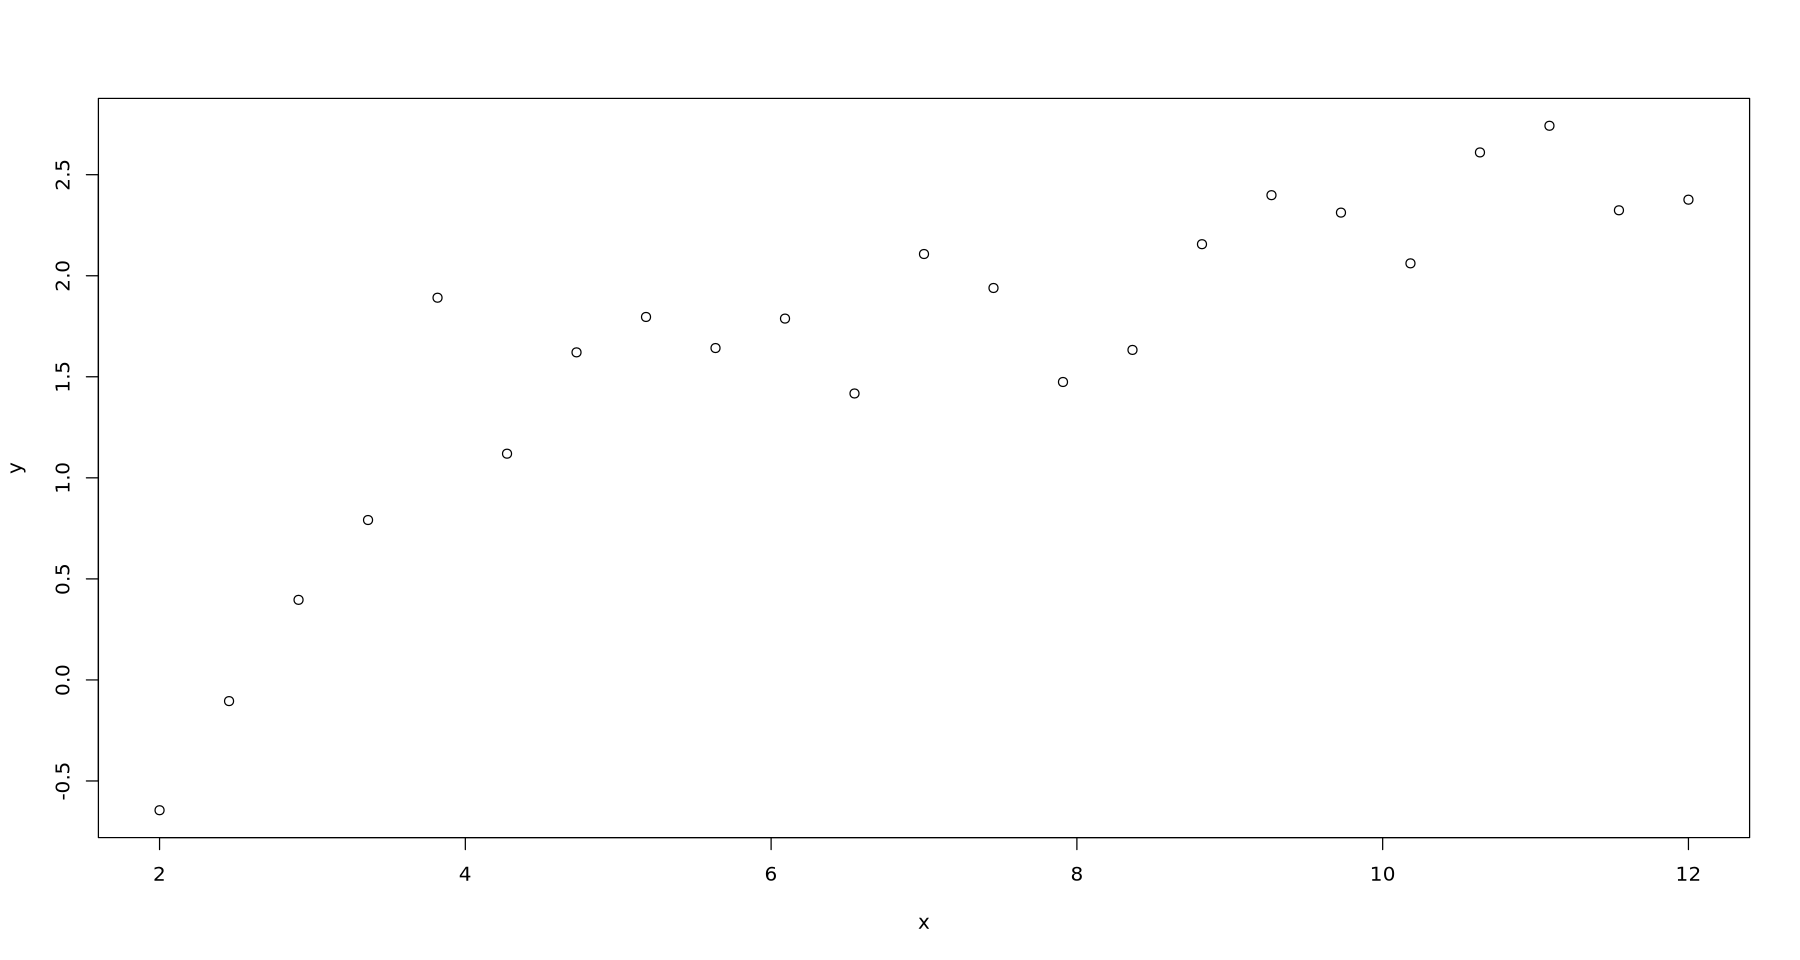

In [87]:
plot(x, y)

In [88]:
wind_fit <- lm(y~x)
summary(wind_fit)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.13025 -0.32575  0.08867  0.26943  0.98392 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.02148    0.24879   0.086    0.932    
x            0.23202    0.03264   7.108 5.19e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.472 on 21 degrees of freedom
Multiple R-squared:  0.7064,	Adjusted R-squared:  0.6924 
F-statistic: 50.52 on 1 and 21 DF,  p-value: 5.192e-07


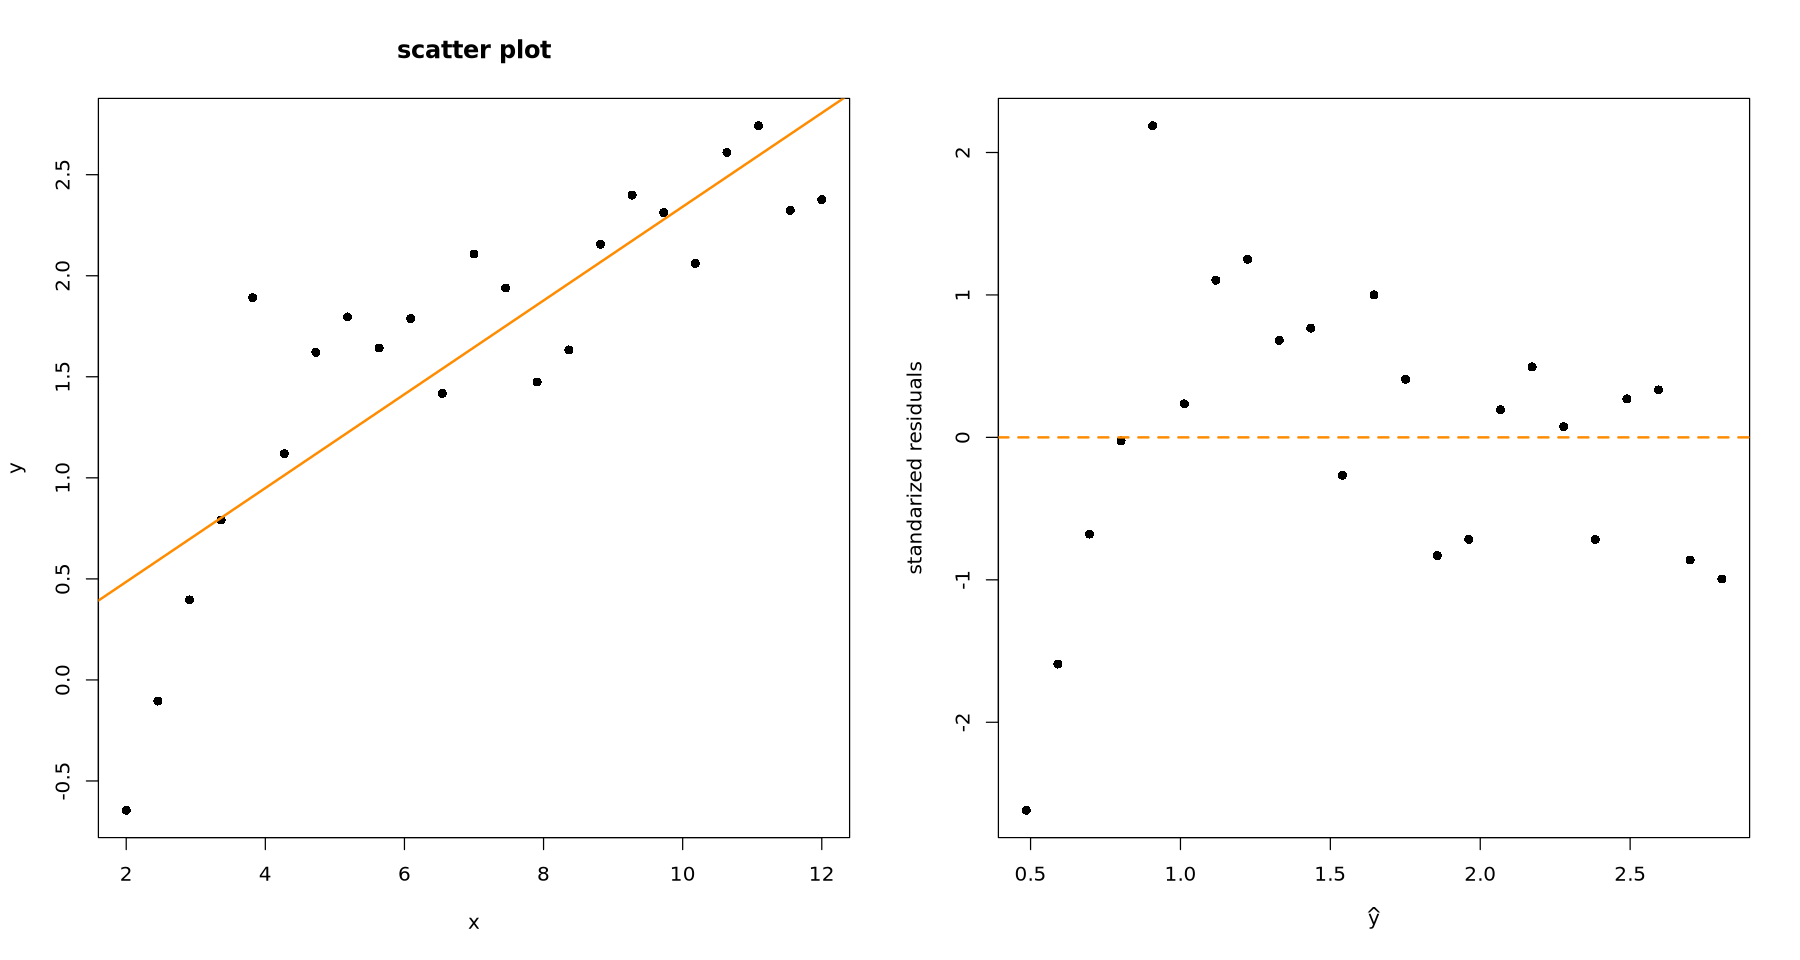

In [89]:
par(mfrow = c(1, 2))
plot(y~x, pch = 16, main = "scatter plot")
abline(wind_fit, col = "darkorange", lwd = 2)
plot(fitted(wind_fit), rstandard(wind_fit), pch = 16, xlab = expression(hat(y)), ylab = "standarized residuals")
abline(h = 0, col = 'darkorange', lwd = 2, lty = 2)

In [90]:
print(paste("coefficient of determination : ", round(summary(wind_fit)$r.squared, 3)))

[1] "coefficient of determination :  0.706"


In [91]:
print(paste("RMSE : ", round(summary(wind_fit)$sigma, 3)))

[1] "RMSE :  0.472"


In [92]:
wind_fit_2 <- lm(y~x+I(x^2))
summary(wind_fit_2)


Call:
lm(formula = y ~ x + I(x^2))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.64782 -0.19326  0.05356  0.14596  1.01712 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.26096    0.45551  -2.768 0.011860 *  
x            0.68189    0.14474   4.711 0.000134 ***
I(x^2)      -0.03213    0.01015  -3.165 0.004870 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3948 on 20 degrees of freedom
Multiple R-squared:  0.8044,	Adjusted R-squared:  0.7848 
F-statistic: 41.12 on 2 and 20 DF,  p-value: 8.213e-08


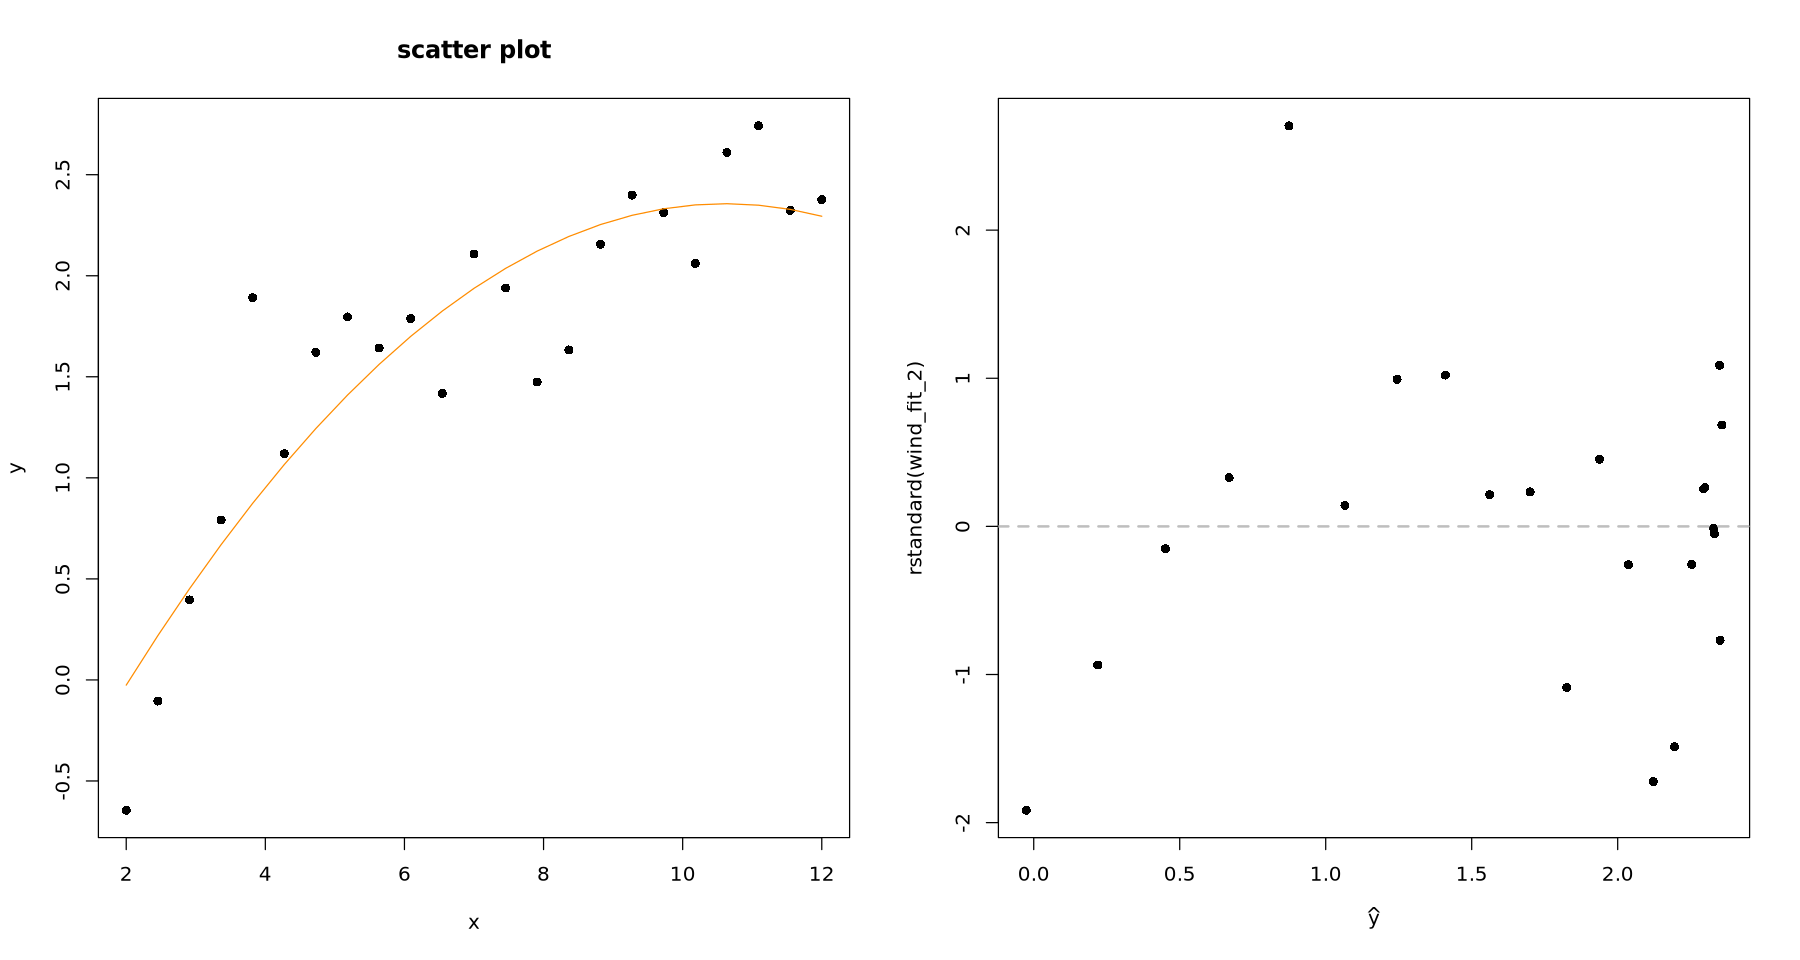

In [93]:
par(mfrow = c(1, 2))
plot(y~x, pch=16, main="scatter plot")
x_new <- sort(x)
lines(x_new, predict(wind_fit_2, newdata = data.frame(x=x_new)), col='darkorange')
plot(fitted(wind_fit_2), rstandard(wind_fit_2), pch =16, xlab = expression(hat(y)))
abline(h =0, col ="grey", lwd =2, lty=2)

In [95]:
print(paste("coefficient of determination : ", round(summary(wind_fit_2)$r.squared, 3)))
print(paste("RMSE : ", round(summary(wind_fit_2)$sigma, 3)))

[1] "coefficient of determination :  0.804"
[1] "RMSE :  0.395"


> 이정도로만 해도 나름 나쁘진 않음

`-` 그래도 여기서 더 적극적으로 많은 방법을 시행해보면 좋다.

In [96]:
wind_fit_3 <- lm(y~I(1/x))
summary(wind_fit_3)


Call:
lm(formula = y ~ I(1/x))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.58733 -0.12975 -0.02321  0.16649  0.80086 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.9680     0.1256   23.64  < 2e-16 ***
I(1/x)       -7.1691     0.5864  -12.23 5.16e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3057 on 21 degrees of freedom
Multiple R-squared:  0.8768,	Adjusted R-squared:  0.871 
F-statistic: 149.5 on 1 and 21 DF,  p-value: 5.156e-11


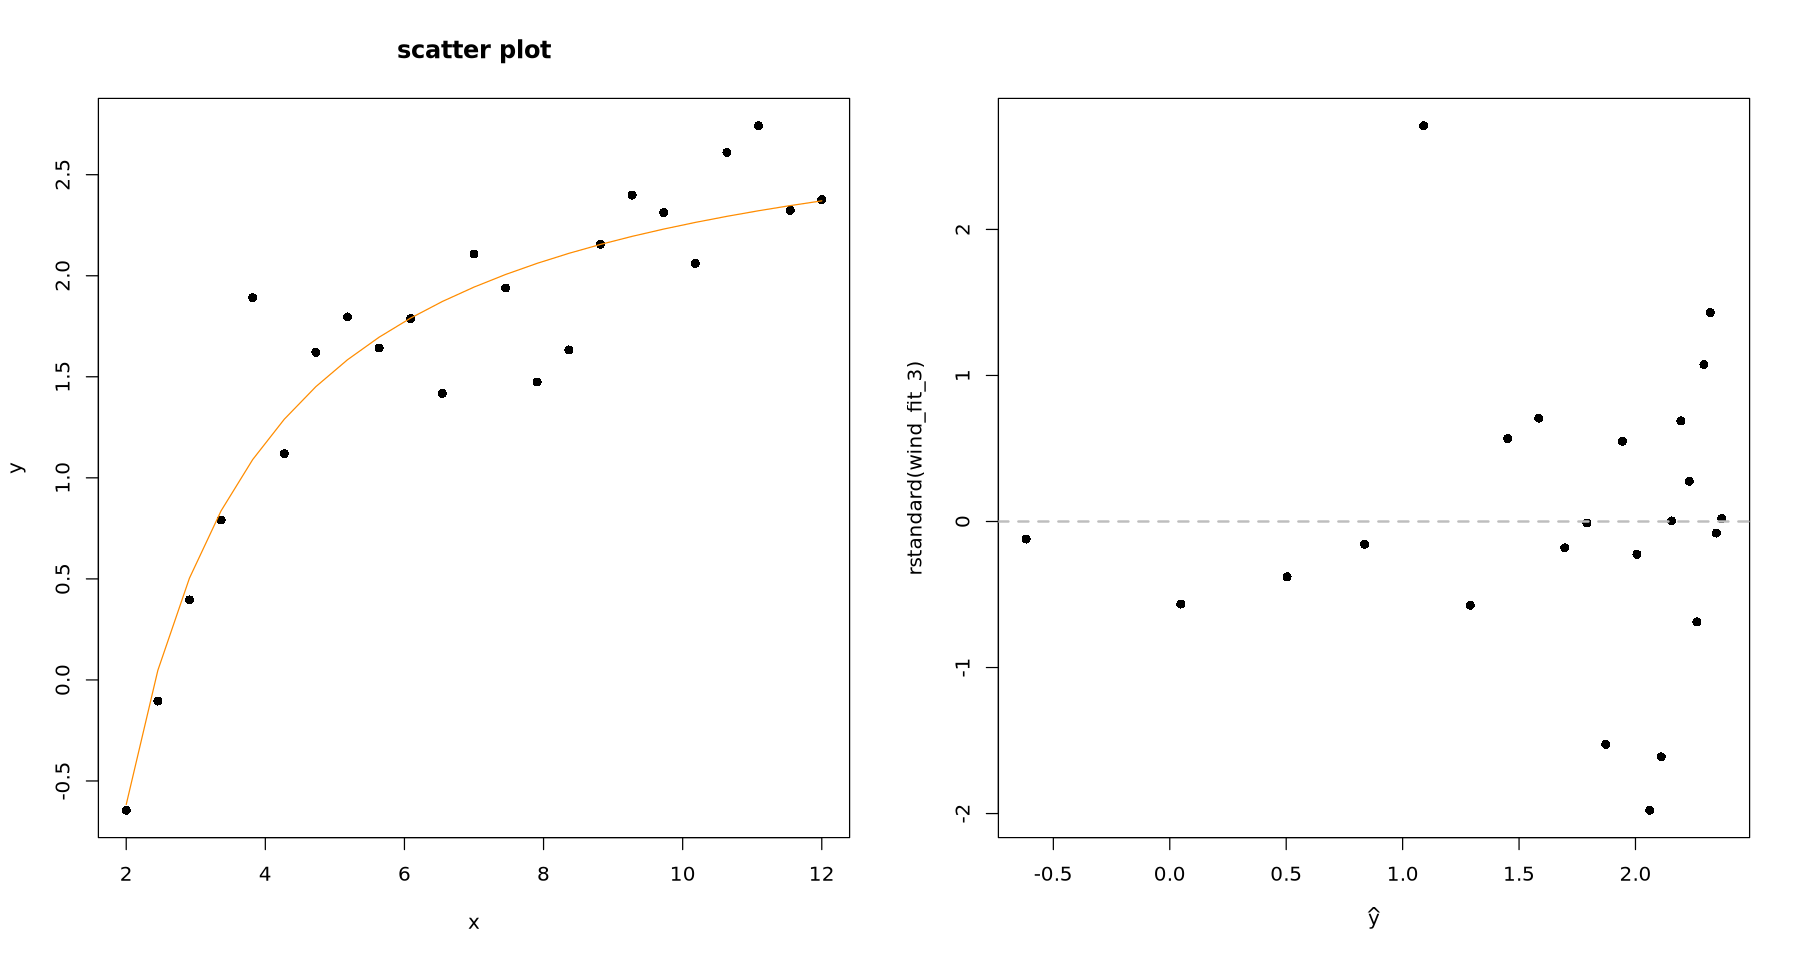

In [101]:
par(mfrow = c(1, 2))
plot(y~x, pch=16, main="scatter plot")
x_new <- sort(x)
lines(x_new, predict(wind_fit_3, newdata = data.frame(x=x_new)), col='darkorange')
plot(fitted(wind_fit_3), rstandard(wind_fit_3), pch =16, xlab = expression(hat(y)))
abline(h =0, col ="grey", lwd =2, lty=2)

In [102]:
print(paste("coefficient of determination : ", round(summary(wind_fit_3)$r.squared, 3)))
print(paste("RMSE : ", round(summary(wind_fit_3)$sigma, 3)))

[1] "coefficient of determination :  0.877"
[1] "RMSE :  0.306"


> 산점도 꼬라지가 좀 이상하긴 하지만,,, 회귀모형이 가장 좋아졌음.

### 변수변환 : 반응 변수 변환

In [103]:
initech <- read.csv("~/R/regression analysis/data/initech.csv")
head(initech)

,years,salary
,<int>,<int>
1,1,41504
2,1,32619
3,1,44322
4,2,40038
5,2,46147
6,2,38447


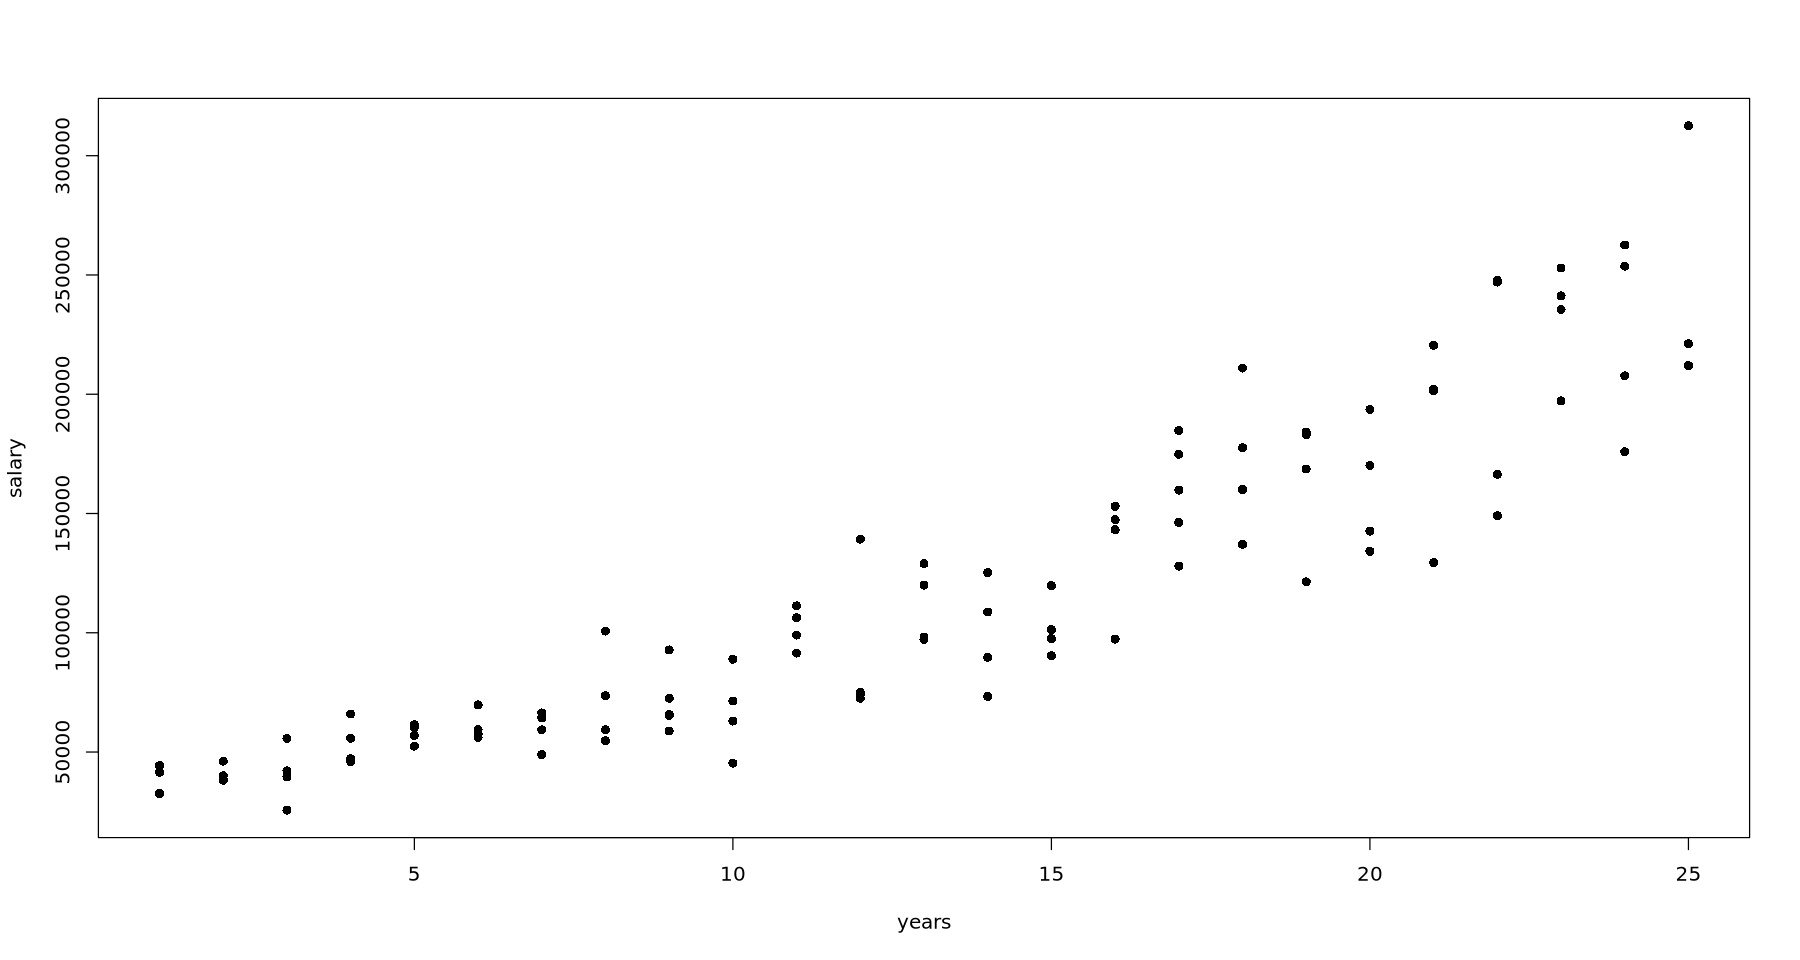

In [104]:
plot(salary~years, initech, pch = 16)

`-` 일반적인 선형회귀 OLS

In [105]:
initech_fit <- lm(salary~years, initech)
summary(initech_fit)


Call:
lm(formula = salary ~ years, data = initech)

Residuals:
   Min     1Q Median     3Q    Max 
-57225 -18104    241  15589  91332 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)     5302       5750   0.922    0.359    
years           8637        389  22.200   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 27360 on 98 degrees of freedom
Multiple R-squared:  0.8341,	Adjusted R-squared:  0.8324 
F-statistic: 492.8 on 1 and 98 DF,  p-value: < 2.2e-16


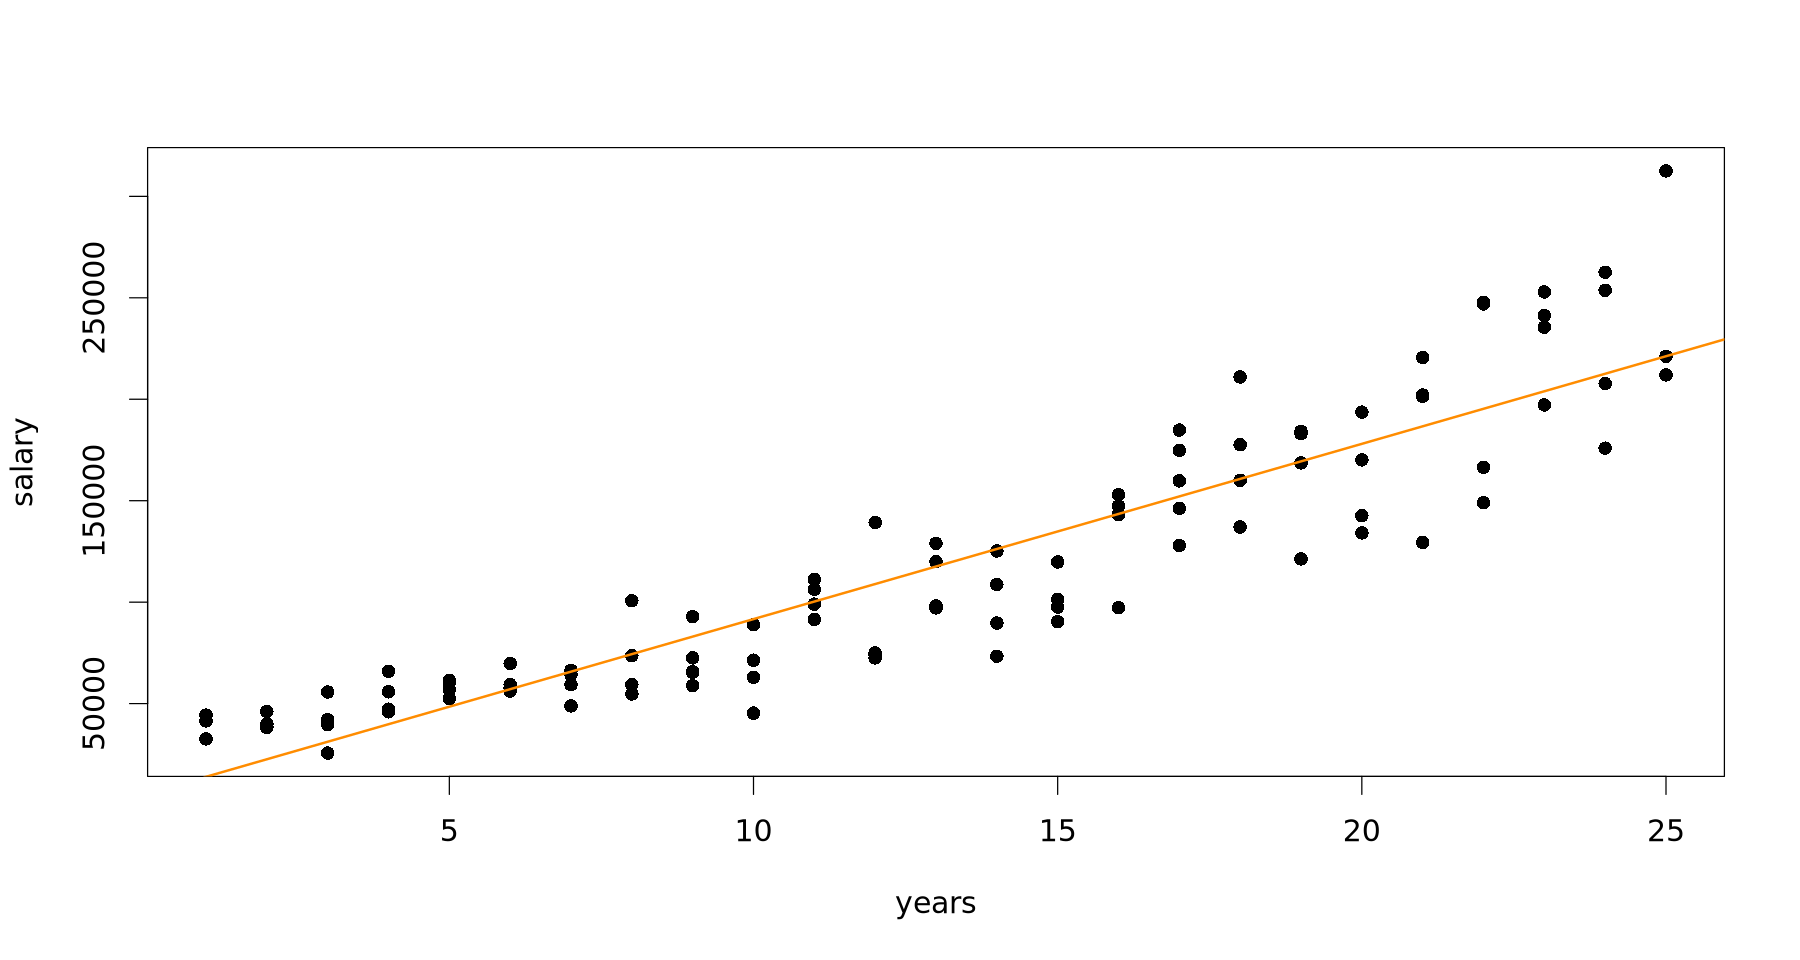

In [106]:
par(cex = 1.5)
plot(salary~years, initech, pch=16)
abline(initech_fit, col='darkorange', lwd=2)

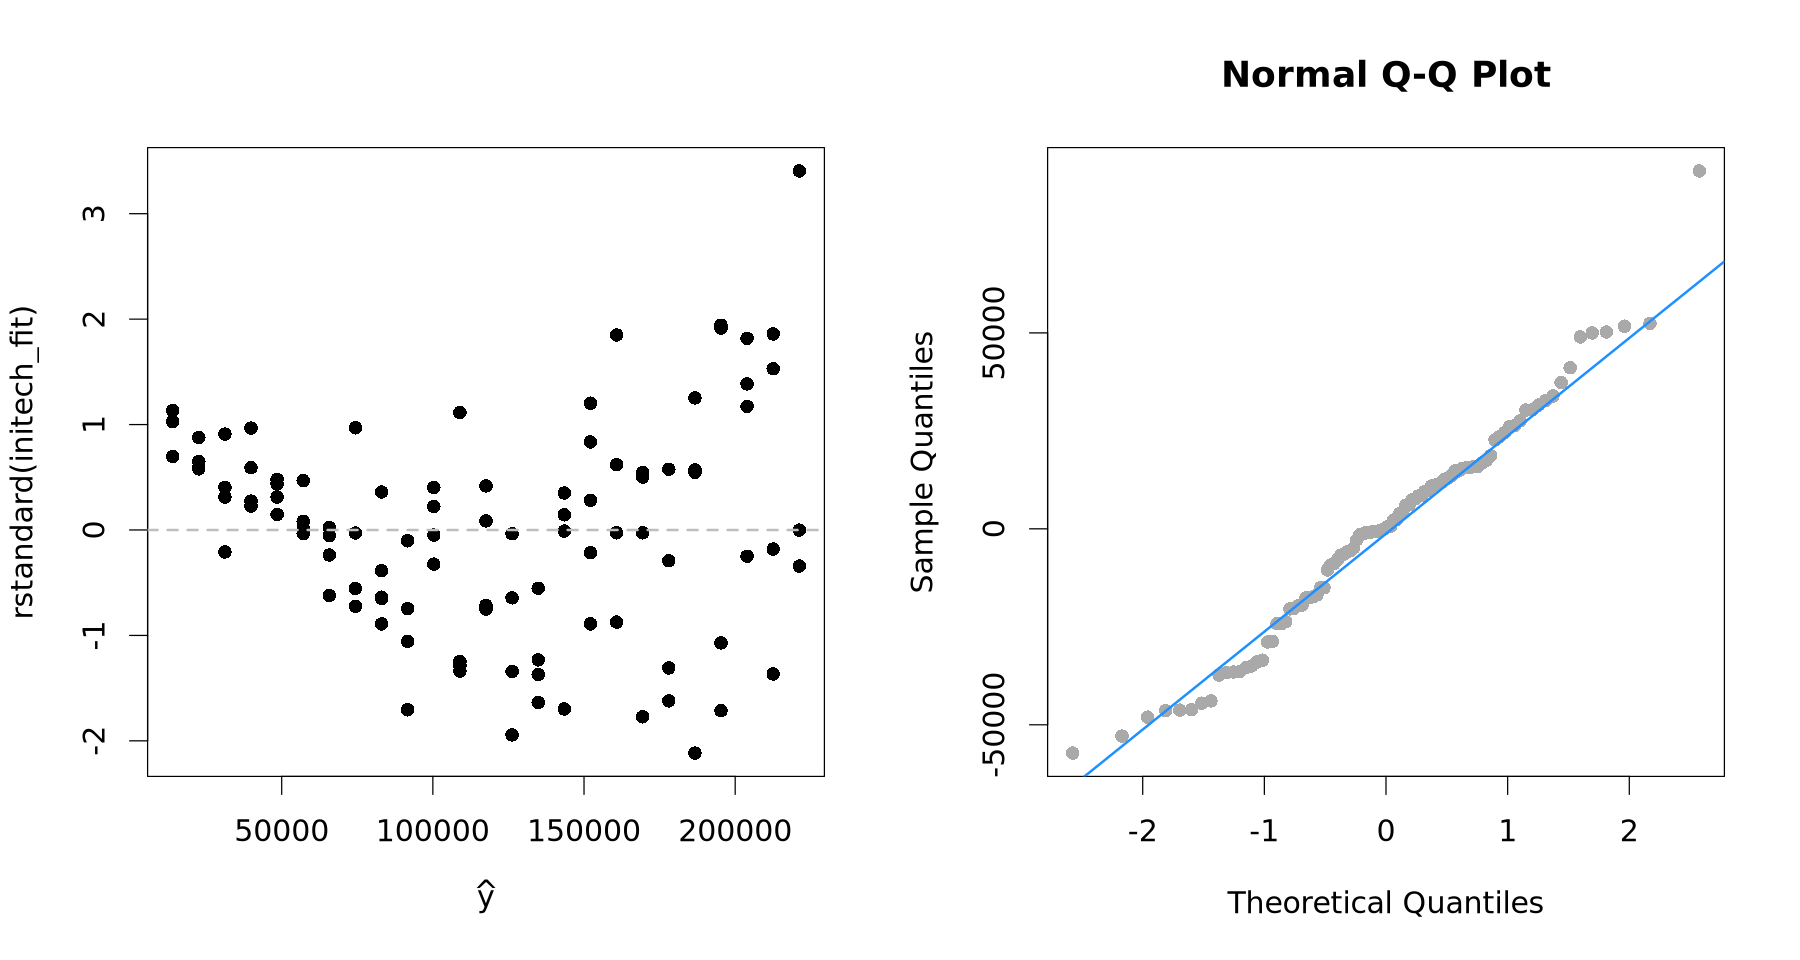

In [114]:
par(mfrow=c(1,2), cex=1.5)
plot(fitted(initech_fit), rstandard(initech_fit), pch =16, xlab = expression(hat(y)))
abline(h =0, col ="grey", lwd =2, lty=2)
qqnorm(resid(initech_fit), pch=16, main ="Normal Q-Q Plot", col ="darkgrey")
qqline(resid(initech_fit), col ="dodgerblue", lwd =2)

> 이분산성 문제, QQ-plot에서의 이상점 존재

`-` 변수변환

$log(y) = \beta_0 + \beta_1x + \epsilon$

In [110]:
initech_fit_log <- lm(log(salary)~years, initech)
summary(initech_fit_log)


Call:
lm(formula = log(salary) ~ years, data = initech)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.57022 -0.13560  0.03048  0.14157  0.41366 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.48381    0.04108  255.18   <2e-16 ***
years        0.07888    0.00278   28.38   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1955 on 98 degrees of freedom
Multiple R-squared:  0.8915,	Adjusted R-squared:  0.8904 
F-statistic: 805.2 on 1 and 98 DF,  p-value: < 2.2e-16


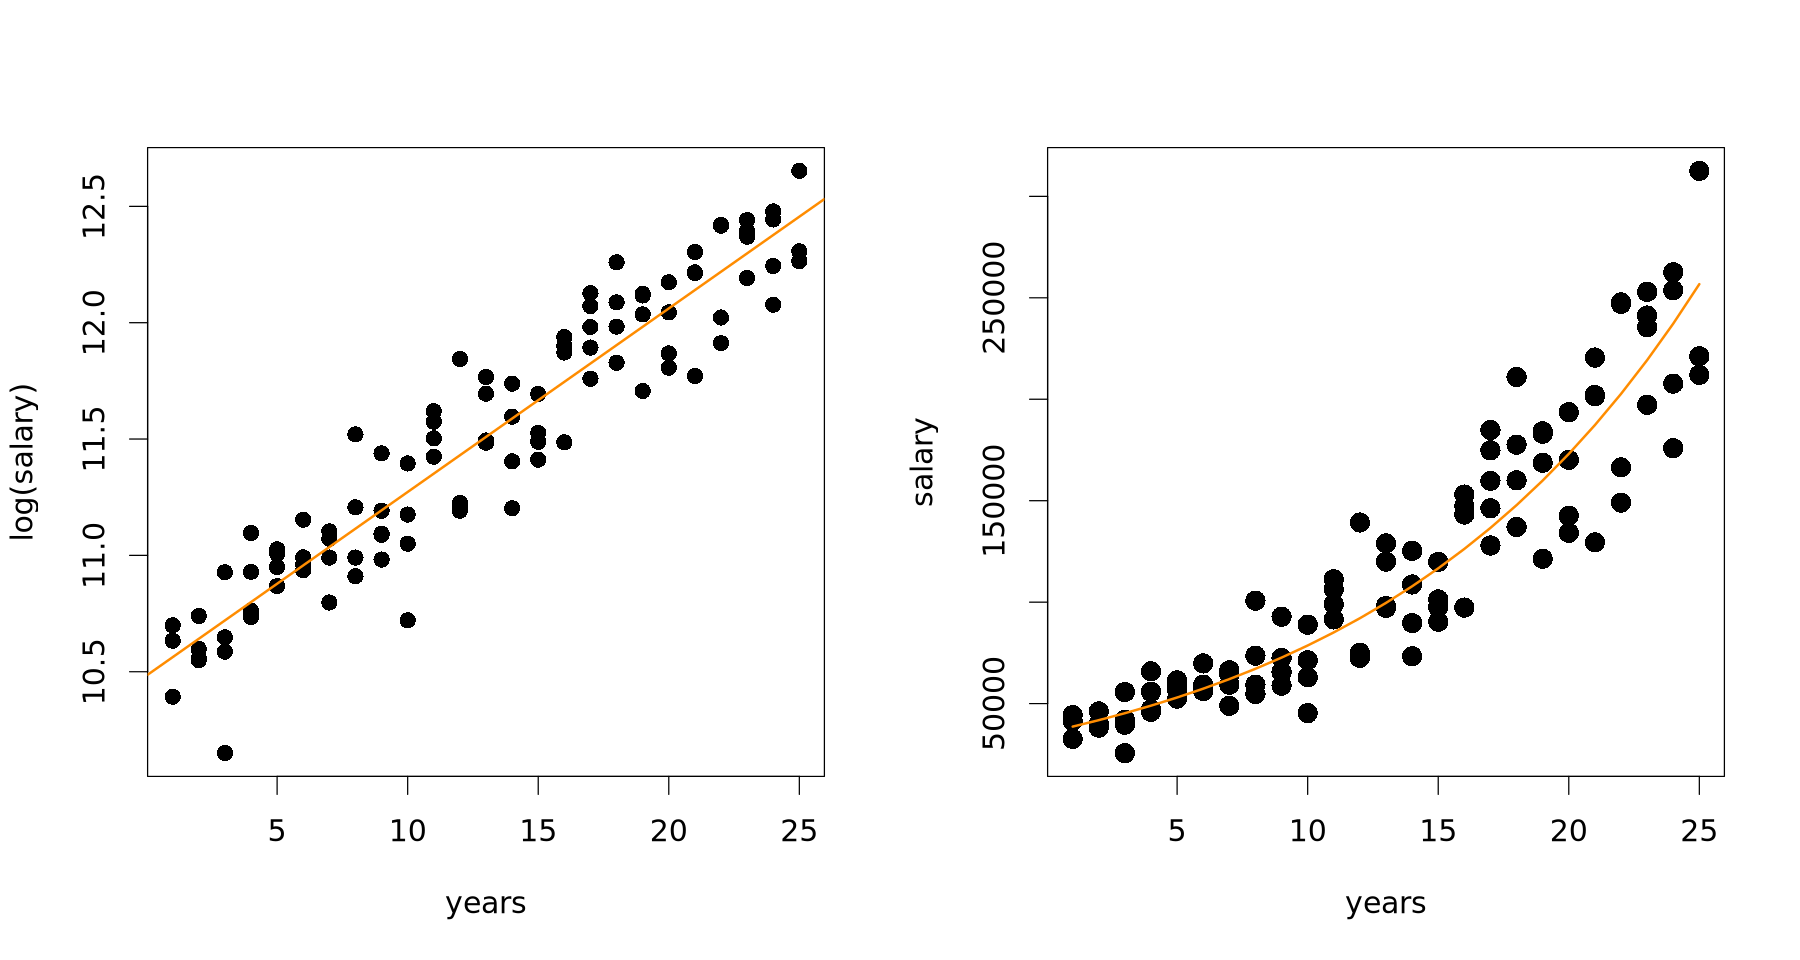

In [111]:
par(mfrow=c(1,2), cex=1.5)
plot(log(salary)~years, initech, pch=16, cex=1.2)
abline(initech_fit_log, col='darkorange', lwd=2)
plot(salary~years, initech,pch=16, cex=1.5)
lines(initech$years,exp(fitted(initech_fit_log)), col="darkorange", lwd=2)  ## exp를 취해 역변환

> 직선형 관계로 변환되었음. 이분산성을 잡아줬을 뿐인데 곡선의 모양으로 되었다. : 변수변환은 GLS

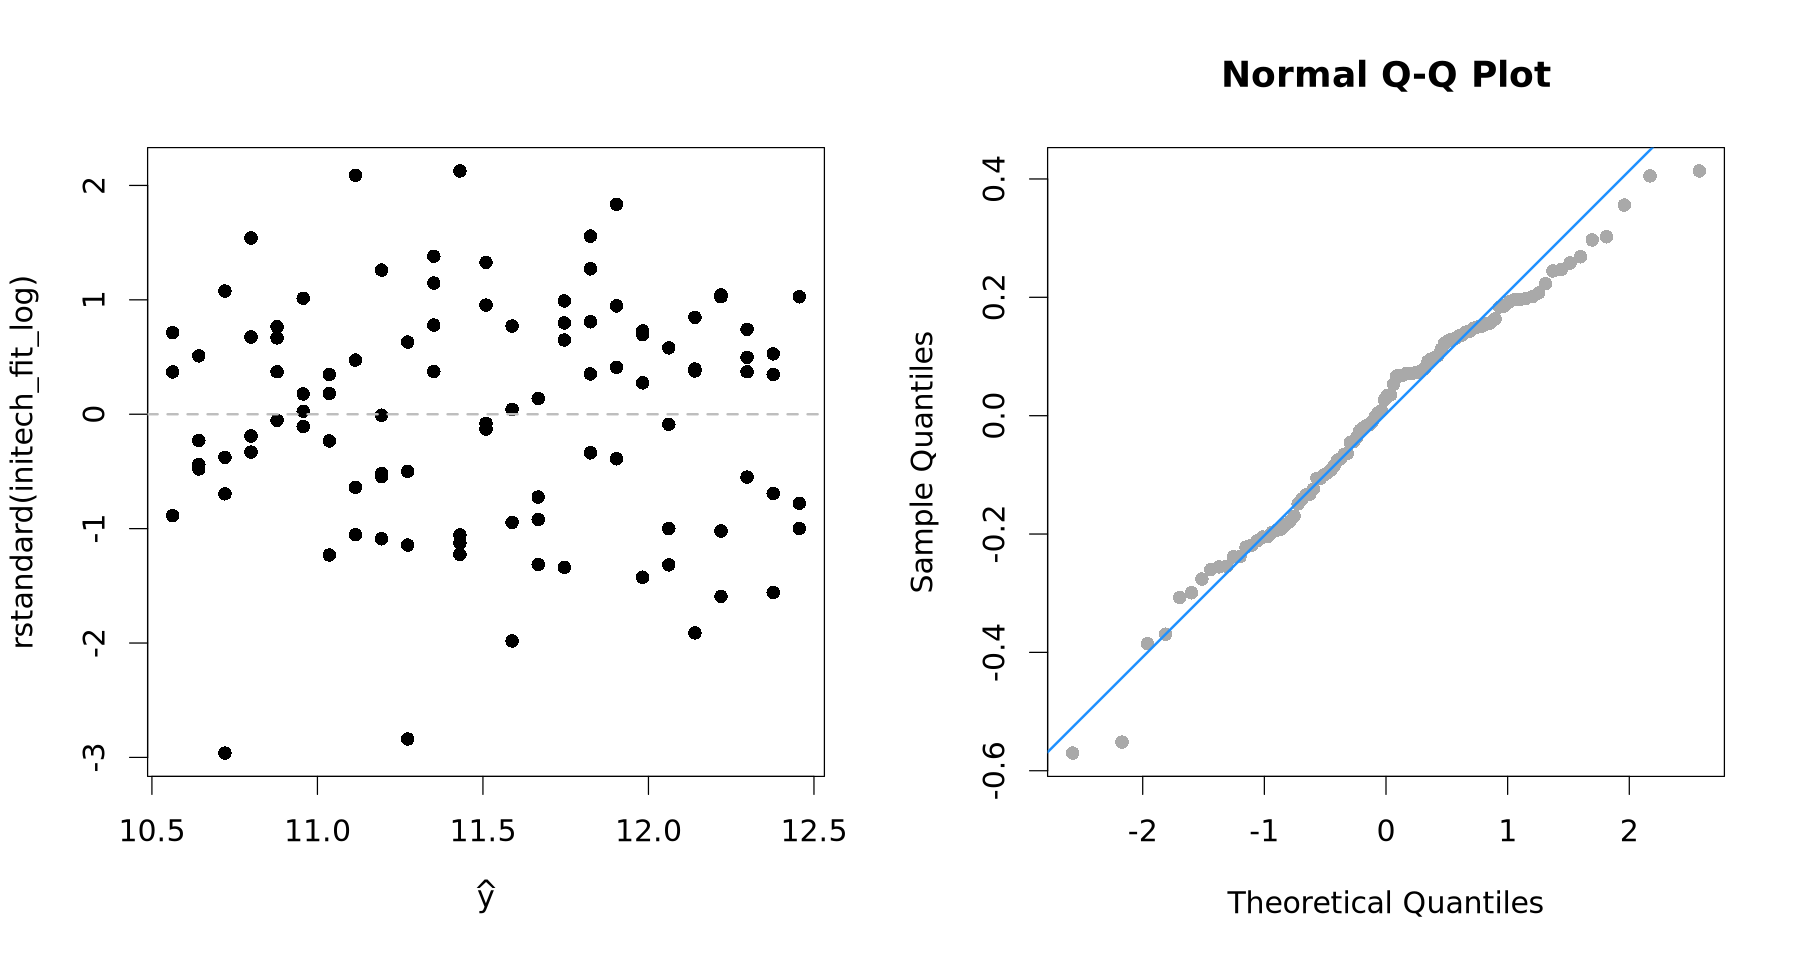

In [113]:
par(mfrow=c(1,2), cex=1.5)
plot(fitted(initech_fit_log), rstandard(initech_fit_log), pch =16, xlab = expression(hat(y)))
abline(h =0, col ="grey", lwd =2, lty=2)
qqnorm(resid(initech_fit_log), pch=16, main ="Normal Q-Q Plot", col ="darkgrey")
qqline(resid(initech_fit_log), col ="dodgerblue", lwd =2)

**MSE, Sigma를 직접 비교하면 안됨!!!**

In [118]:
print(paste("변환 이전 : ", summary(initech_fit)$sigma))
print(paste("변환 이후 : ", summary(initech_fit_log)$sigma))

[1] "변환 이전 :  27355.0944284452"
[1] "변환 이후 :  0.195455087632113"


In [125]:
sqrt((sum((initech$salary - fitted(initech_fit))^2))/(dim(initech)[1] - 2))

[1] 27355.09

In [126]:
sqrt((sum((initech$salary - exp(fitted(initech_fit_log)))^2))/(dim(initech)[1] - 2))

[1] 24526.87

`-` box-cox transpose

$$y \to z = \frac{y^\lambda - 1}{\lambda}$$

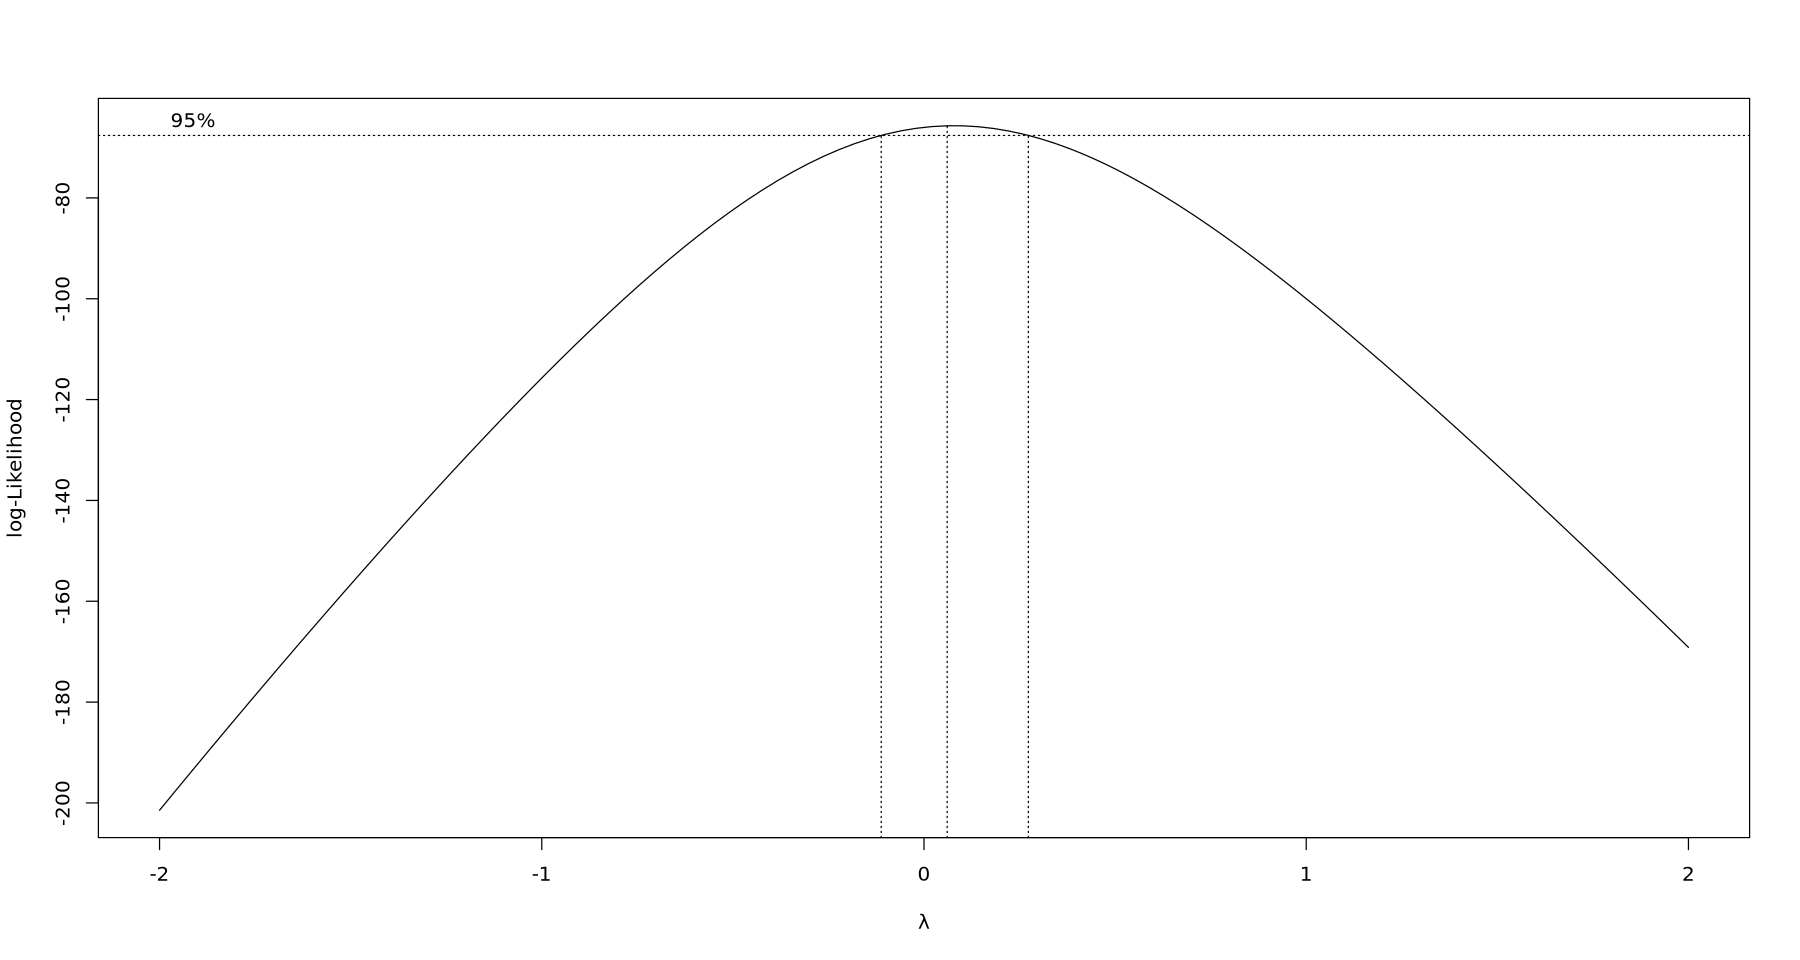

In [127]:
library(MASS)
boxcox(initech_fit, plotit = TRUE)

> MLE로 추정한 $\lambda$.

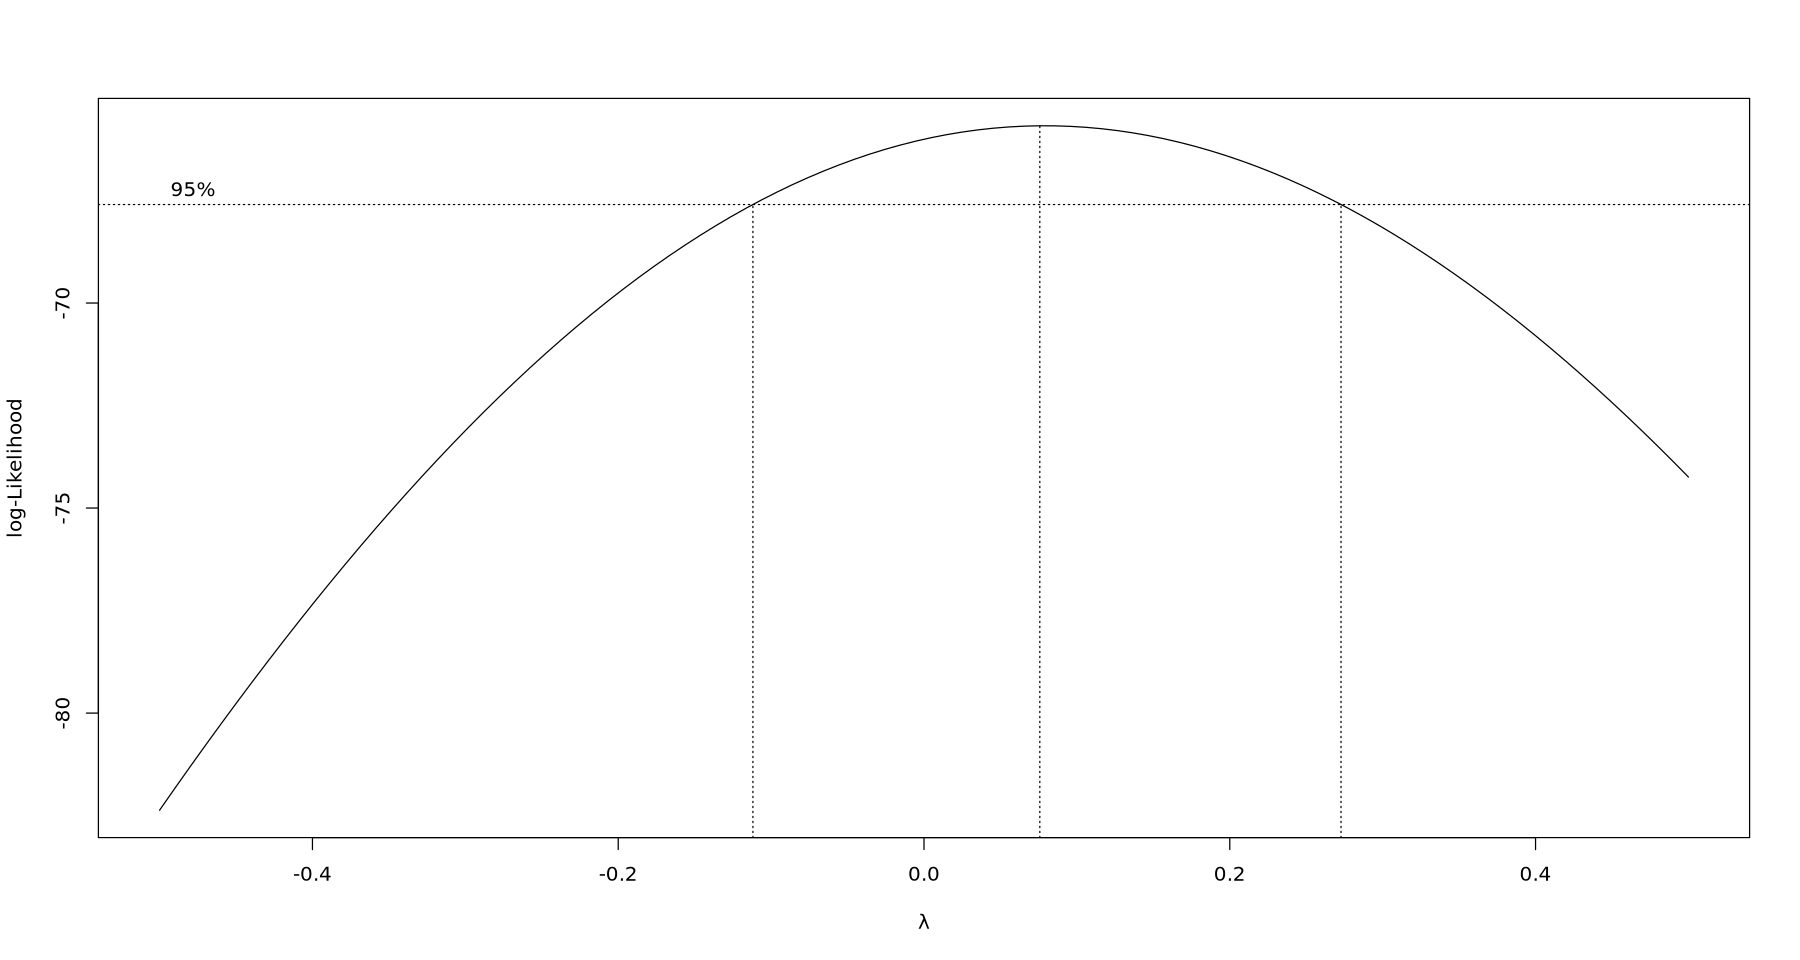

In [128]:
boxcox(initech_fit, plotit = TRUE, lambda = seq(-0.5, 0.5, by = 0.1))

> 0이 95% CI에 들어가있으니까, 로그변환을 해도 되겠구나!

### WLSE

$$y_i = \beta_0 + \beta_1x_1 + \epsilon_i, ~ Var(\epsilon_i) = \sigma^2_i = \frac{\sigma^2}{w_i}, i = 1, \cdots, n$$

In [129]:
set.seed(2002)
n <- 50
x <- round(runif(n, 1, 15), 2)
y <- 20+5*x + rnorm(n, 0, 2*x)  ## w = 1/x^2

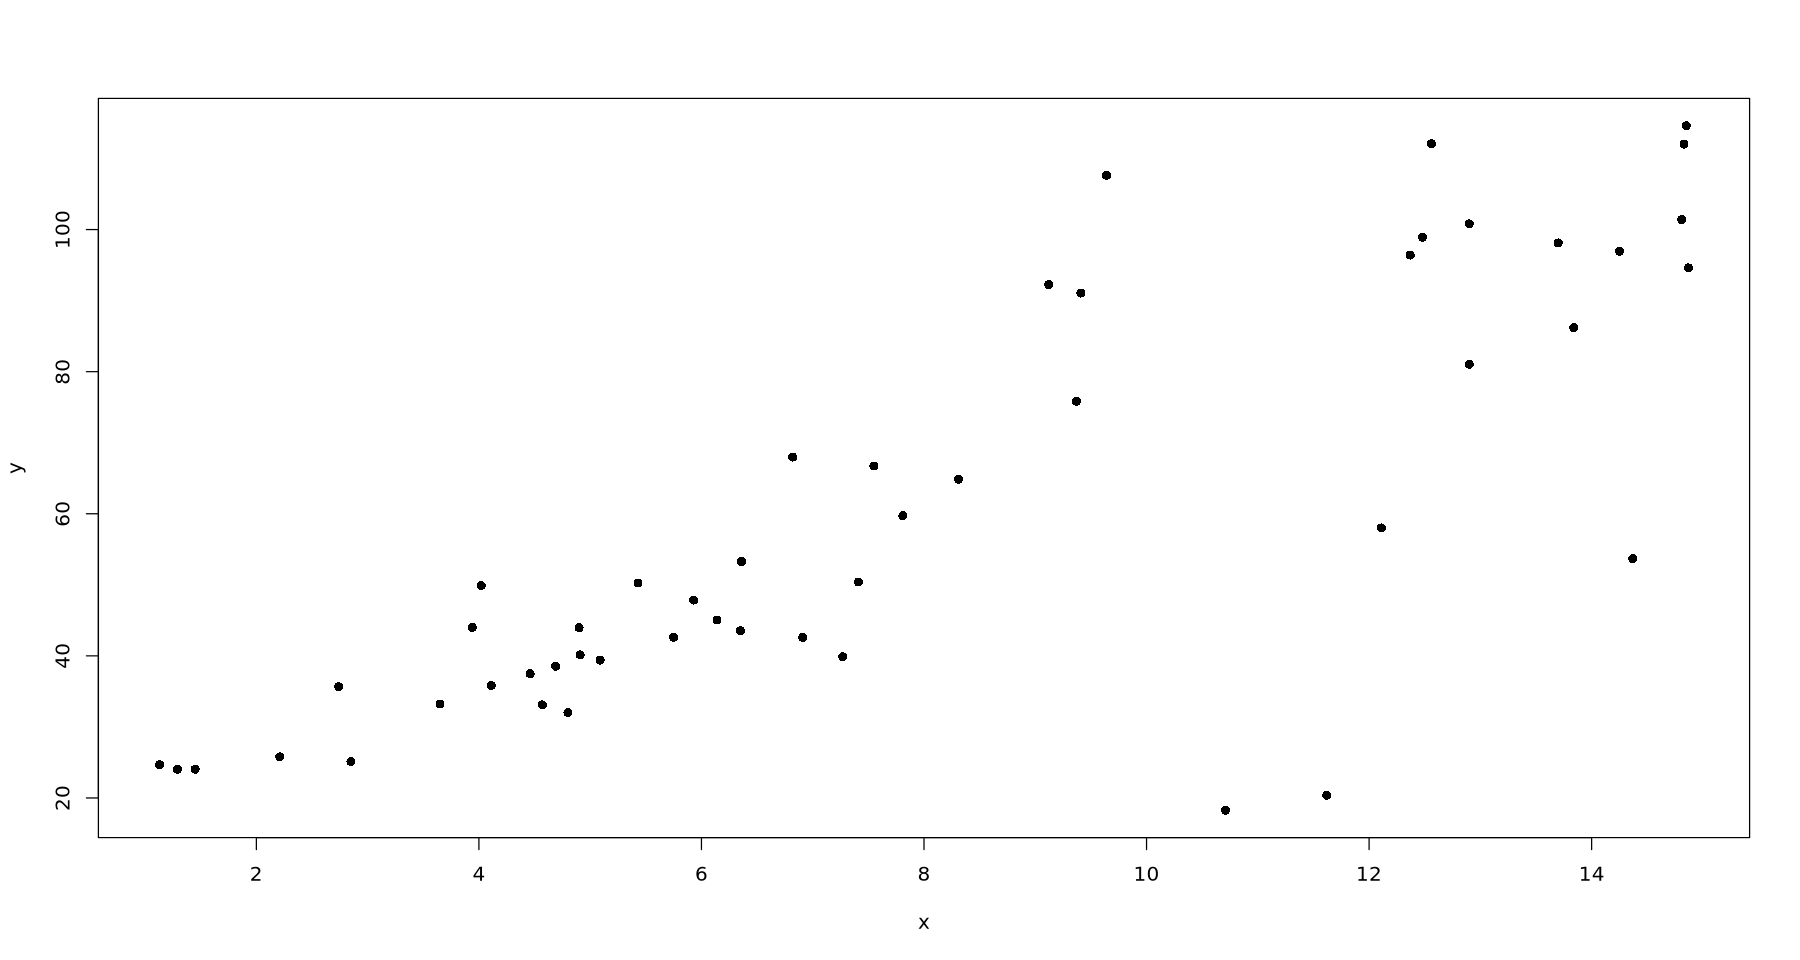

In [130]:
plot(y~x, pch = 16)

> 존나 이분산성임

In [131]:
m <- lm(y~x)
m1 <- lm(y~x, weights = 1/x^2)

In [132]:
summary(m)


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-59.027  -5.182   0.936   8.418  39.112 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   15.479      5.405   2.864  0.00619 ** 
x              5.501      0.599   9.183 3.82e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17.74 on 48 degrees of freedom
Multiple R-squared:  0.6373,	Adjusted R-squared:  0.6297 
F-statistic: 84.33 on 1 and 48 DF,  p-value: 3.819e-12


In [133]:
summary(m1)


Call:
lm(formula = y ~ x, weights = 1/x^2)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-5.1240 -0.8126  0.0533  1.2360  4.1564 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  17.1199     1.5061   11.37 3.24e-15 ***
x             5.2319     0.3884   13.47  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.835 on 48 degrees of freedom
Multiple R-squared:  0.7908,	Adjusted R-squared:  0.7865 
F-statistic: 181.5 on 1 and 48 DF,  p-value: < 2.2e-16


> WLSE가 결정계수, F-statistics, MSE, 개별 회귀계수의 표준오차 전부 좋게 나왔다.

`-` 가중치가 $1/x^2$이 아닐수도 있잖아?? (실제 값을 모른다고 가정하자고.)

In [134]:
m2 <- lm(y~x, weight = 1/x)
summary(m2)


Call:
lm(formula = y ~ x, weights = 1/x)

Weighted Residuals:
     Min       1Q   Median       3Q      Max 
-17.2250  -1.8790   0.2387   3.1872  12.6425 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  16.1617     3.0222   5.348 2.44e-06 ***
x             5.4158     0.4683  11.564 1.76e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.521 on 48 degrees of freedom
Multiple R-squared:  0.7359,	Adjusted R-squared:  0.7304 
F-statistic: 133.7 on 1 and 48 DF,  p-value: 1.762e-15


> 그래도 OLS 모델보단 낫다...!

**물론, 항상 WLSE가 OLS보다 모수를 더 잘 추정하는 것은 아니다. 하지만 표준오차는 무조건 줄어든다.**

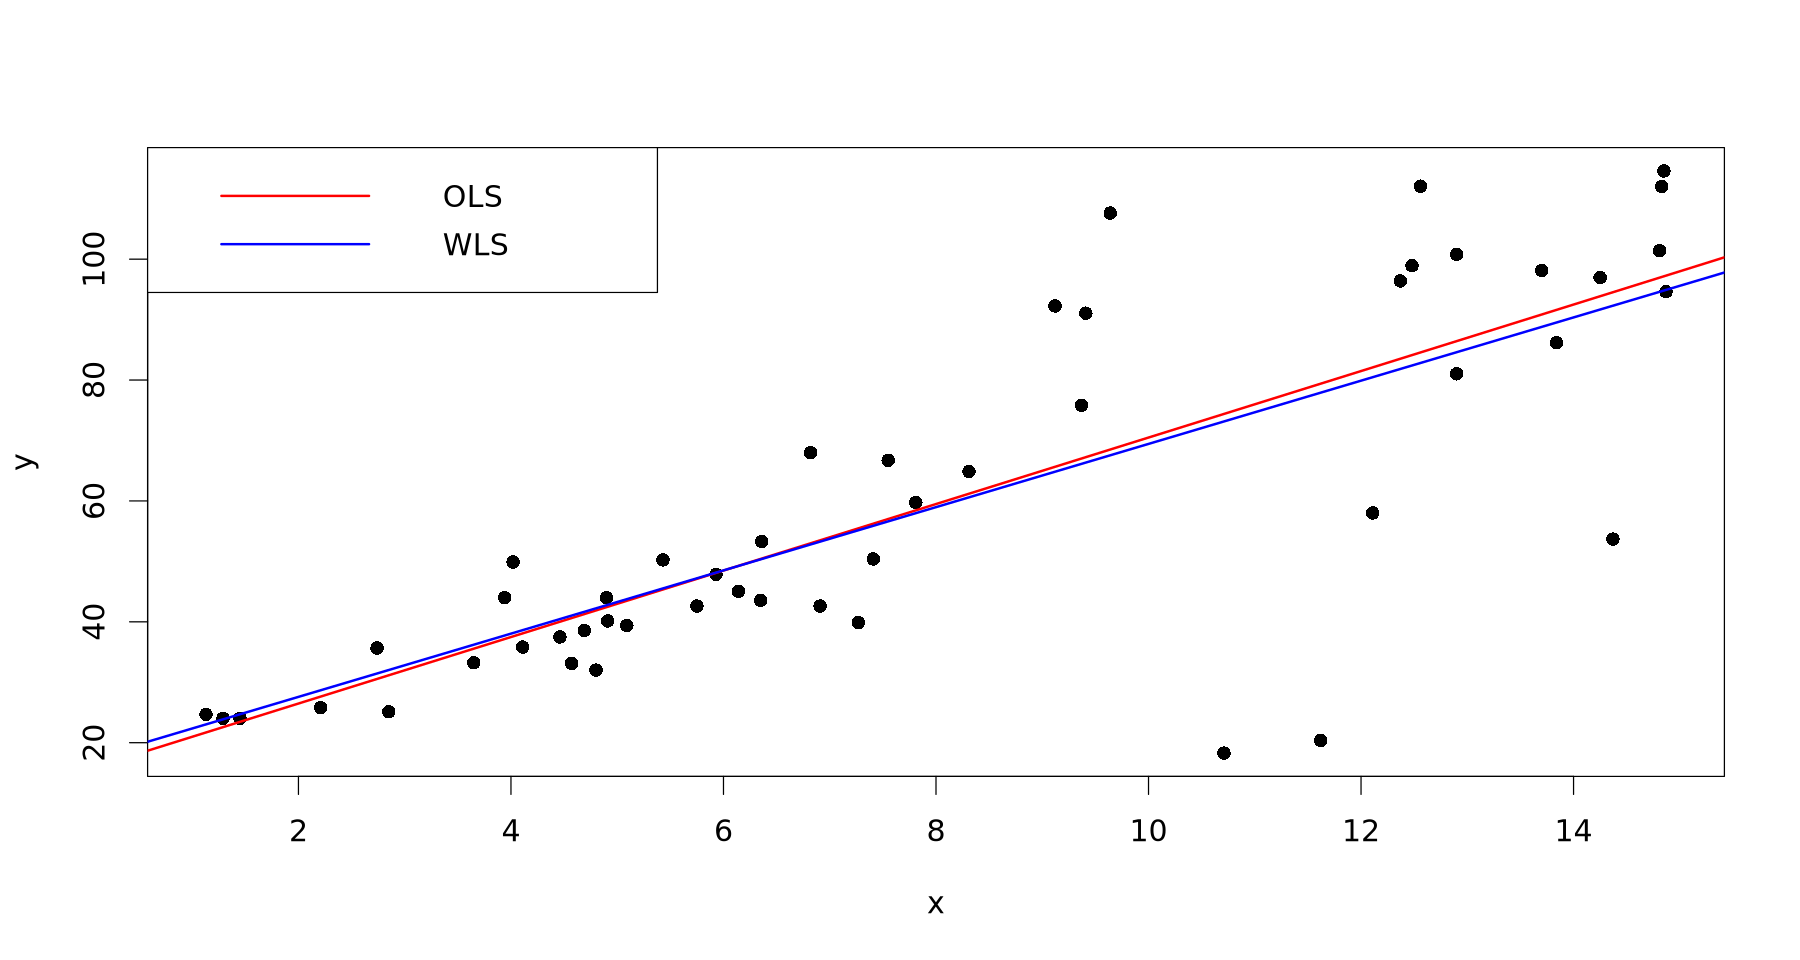

In [141]:
par(cex = 1.5)
plot(x,y,pch=16)
abline(m, col='red', lwd=2)
abline(m1, col='blue', lwd=2)
legend("topleft",c('OLS',"WLS"), lty=1, col=c('red','blue'), lwd=2)

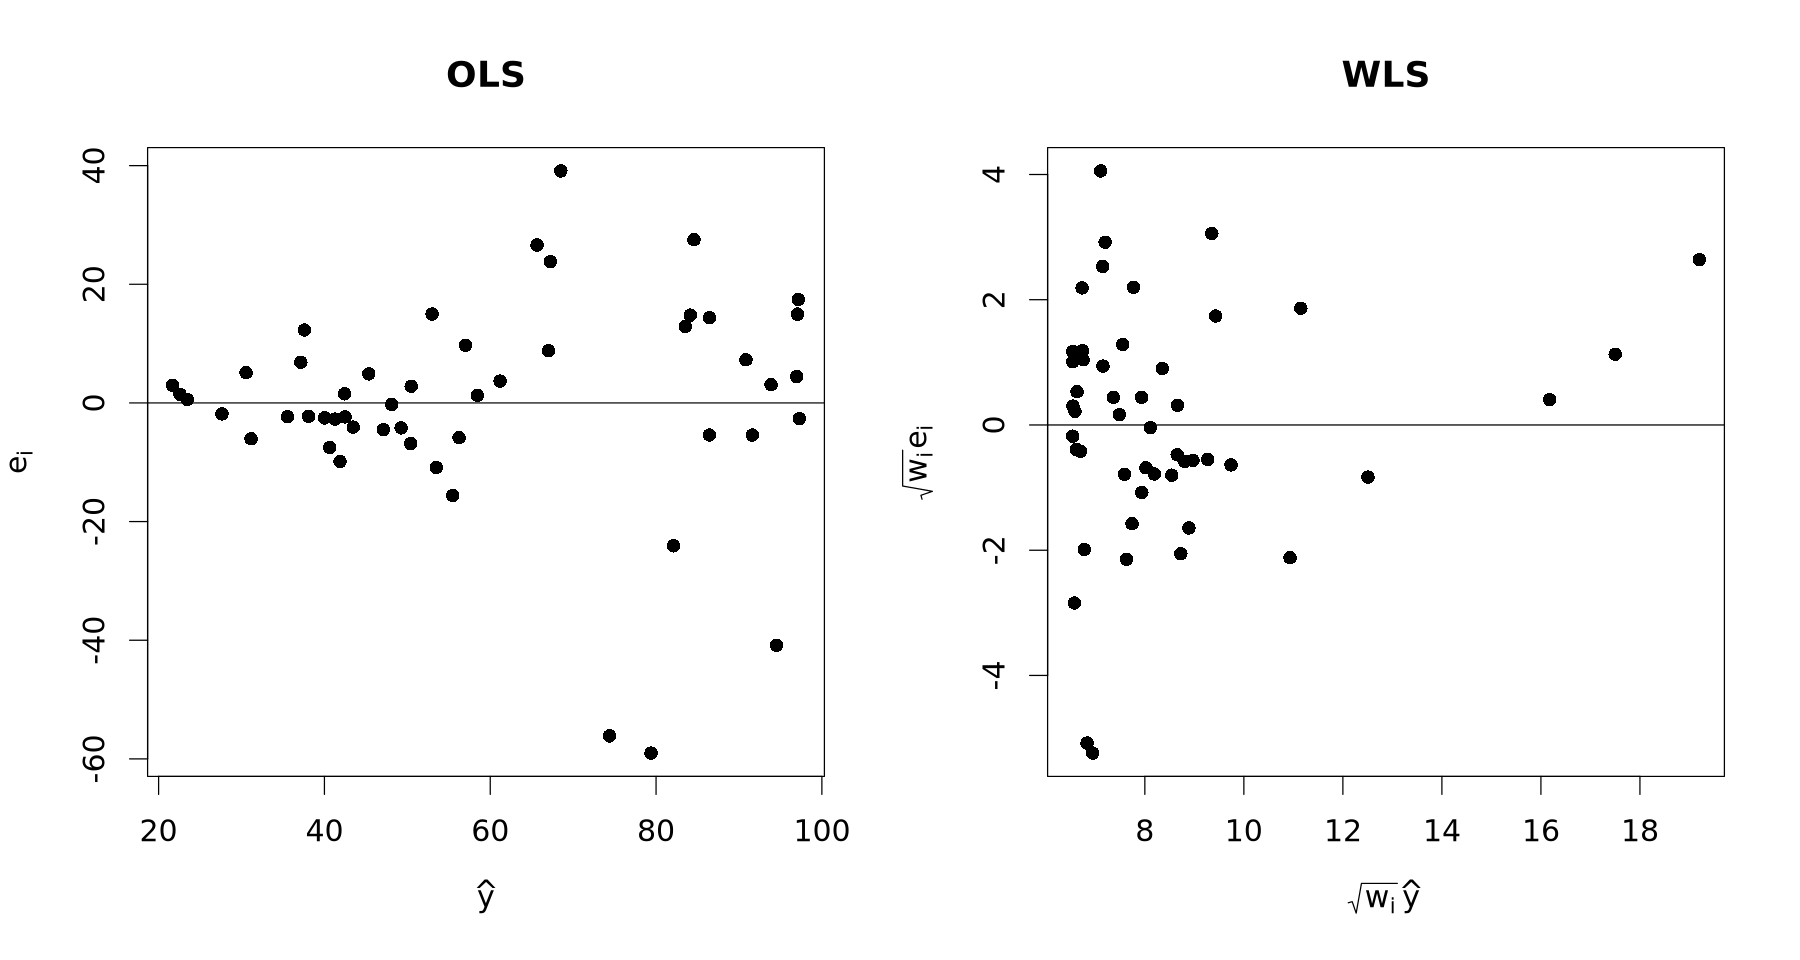

In [140]:
par(mfrow = c(1,2), cex = 1.5)
plot(fitted(m), resid(m), pch = 16, xlab = expression(hat(y)), ylab = expression(e[i]), main = "OLS")
abline(h = 0)

plot(fitted(m)/x, resid(m)/x, pch = 16, xlab = expression(sqrt(w[i])*hat(y)), ylab = expression(sqrt(w[i])*e[i]), main = "WLS")
abline(h = 0)

`-` GLS의 관점에서 해석

$\boldsymbol{y} = \boldsymbol{X\beta + \epsilon}, ~ \boldsymbol{\epsilon} \sim N(\boldsymbol0, V\sigma^2)$

$\widehat{\boldsymbol{\beta}}^* = (X^\top V^{-1} X)^{-1}X^\top V^{-1} \boldsymbol{y}$

In [145]:
V = diag(x^2)  ## sigma : 2*x
X = model.matrix(m)  ## cbind(1, x)
V_inv = solve(V)

beta = solve(t(X)%*%V_inv%*%X)%*%t(X)%*%V_inv%*%y
beta

(Intercept),17.119854
x,5.231896


In [148]:
summary(m1)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),17.119854,1.5061004,11.36701,3.240582e-15
x,5.231896,0.3883814,13.47103,6.312244e-18


> GLS로 구하는 것과 WLS로 구하는 것은 동일하다.

### 1차 자기상관 회귀모형

In [160]:
x1 <- seq(133.6, 177, length = 16)
x <- c(x1, 181, 184, 187, 189)
epsilon <- rnorm(16)
y <- c(2.1*x1 + 90 + epsilon, c(465, 444, 445, 450))

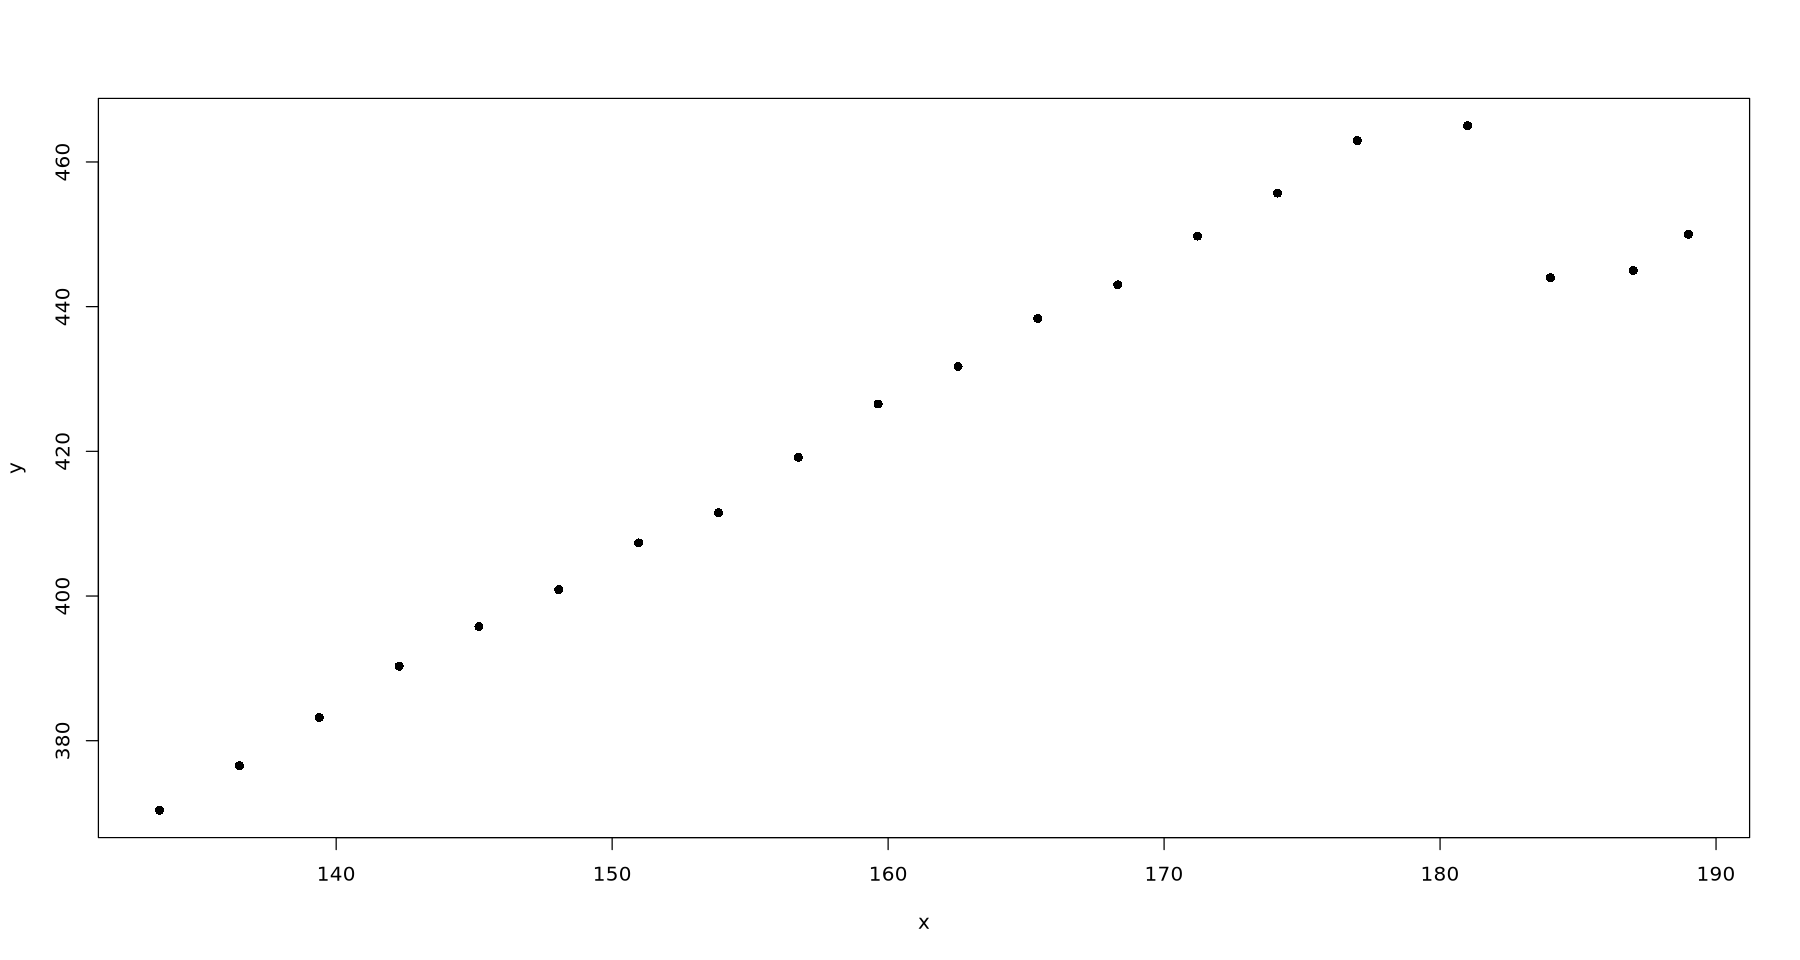

In [162]:
plot(x, y, pch = 16)

In [166]:
m <- lm(y~x)
summary(m)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.6377  -5.4908   0.3332   8.3675  14.3635 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 164.3945    21.9106   7.503 6.03e-07 ***
x             1.6056     0.1351  11.884 5.90e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.25 on 18 degrees of freedom
Multiple R-squared:  0.887,	Adjusted R-squared:  0.8807 
F-statistic: 141.2 on 1 and 18 DF,  p-value: 5.898e-10


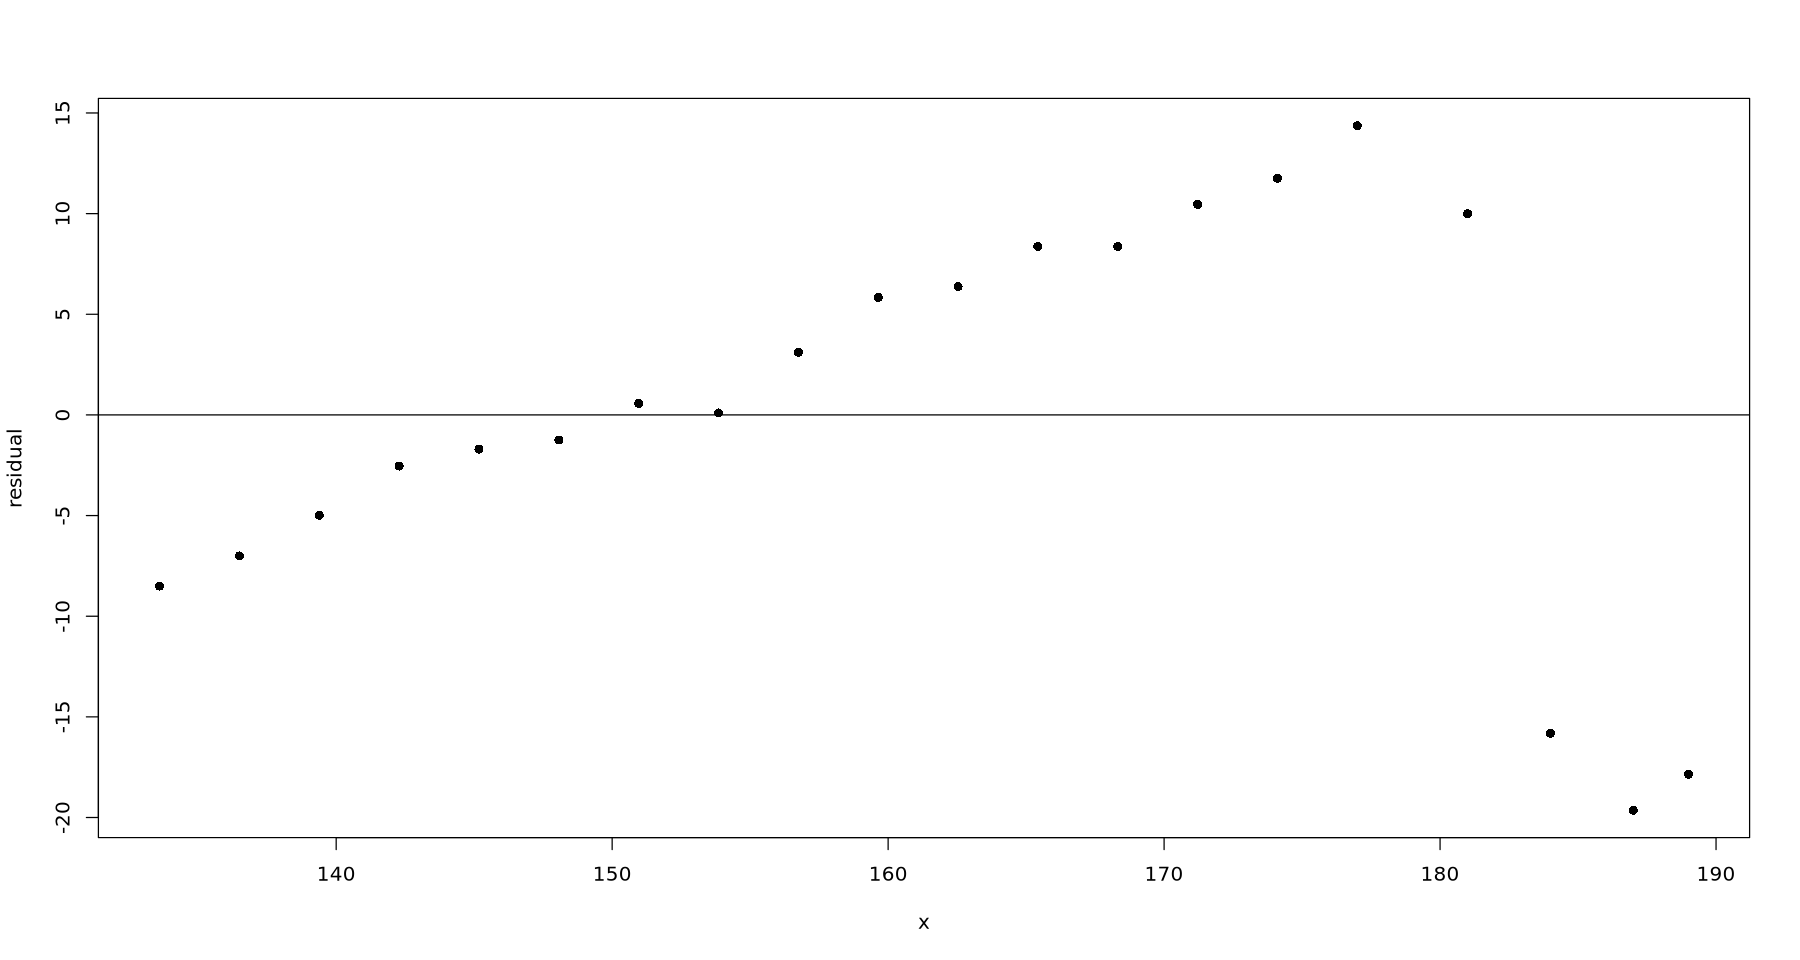

In [170]:
plot(x, resid(m), pch = 16, ylab = "residual")
abline(h = 0)

> 딱봐도 뭔가 문제가 있어보임

In [163]:
library(lmtest)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




`-` DW test

$H_0 : \rho_1 = corr(\epsilon_t, \epsilon_{t-1}) = 0 ~ vs. ~ H_1 : \rho_1 \neq 0$

In [172]:
dwtest(m, alternative = "two.sided")


	Durbin-Watson test

data:  m
DW = 0.39876, p-value = 4.81e-07
alternative hypothesis: true autocorrelation is not 0


> 잔차의 1차 자기상관이 있는 것으로 드러났다.

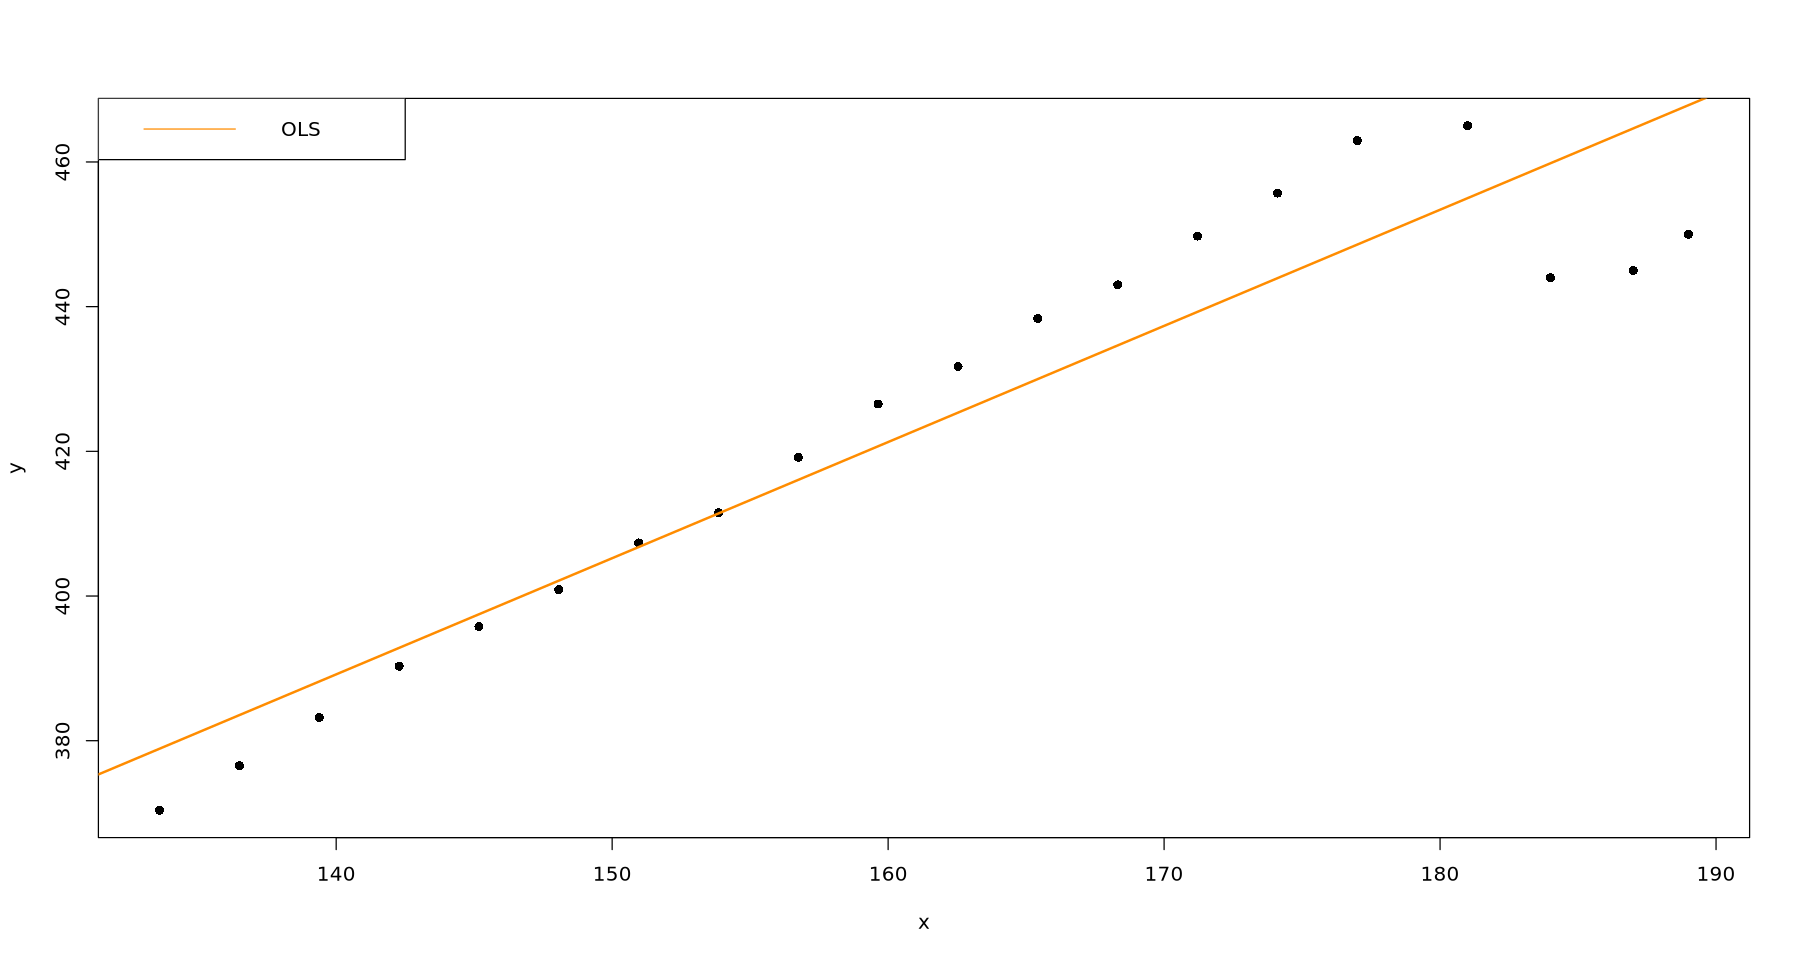

In [173]:
plot(y~x, pch = 16)
abline(m, col = 'darkorange', lwd = 2)
legend("topleft", "OLS", col = 'darkorange', lty = 1)

`-` 해결법 : 변수 변환

$y_i' = y_i - \hat{\rho}y_{i-1}, ~ x_i' = x_i - \hat{\rho}x_{i-1} \Rightarrow y_i' = \beta_0' + \beta_1x_i' + \epsilon_i'$

$\hat{\rho} : $ OLS에서의 잔차의 자기상관, $i$는 2부터 시작

In [179]:
bar_e1 <- mean(resid(m)[-1])
bar_e2 <- mean(resid(m)[-20])

## sum((resid(m)[-1] - bar_e1)*(resid(m)[-20] - bar_e2))/sum((resid(m)[-1] - bar_e1)^2)
hat_rho <- sum(resid(m)[-1]*resid(m)[-20]/sum((resid(m)[-20])^2))  ## 자기상관은 OLS의 적합이 선행
## cor(resid(m)[-1], resid(m)[-20])

In [181]:
y1 <- y[-1] - hat_rho*y[-20]  ## 하나씩 줄어듦
x1 <- x[-1] - hat_rho*x[-20]

m1 <- lm(y1~x1)
summary(m1)


Call:
lm(formula = y1 ~ x1)

Residuals:
    Min      1Q  Median      3Q     Max 
-20.693  -1.729   1.770   2.792   6.912 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  52.1978    15.0242   3.474   0.0029 **
x1            0.7006     0.5209   1.345   0.1963   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.958 on 17 degrees of freedom
Multiple R-squared:  0.09618,	Adjusted R-squared:  0.04301 
F-statistic: 1.809 on 1 and 17 DF,  p-value: 0.1963


> 회귀모형이 유의하지 않게 바뀌었음.

In [182]:
dwtest(m1, alternative = "two.sided")


	Durbin-Watson test

data:  m1
DW = 1.537, p-value = 0.1873
alternative hypothesis: true autocorrelation is not 0


> 자기상관도 없어진 모형임. 모형도 유의하지 않고, 설명력도 없다.

`-` 다른 방법으로 적합해봐도 됨(아무거나 시도해보고 성능이 개선되는지 확인)

In [183]:
m2 <- lm(y~x+I(x^2)+I(x^3))
summary(m2)


Call:
lm(formula = y ~ x + I(x^2))

Residuals:
   Min     1Q Median     3Q    Max 
-9.545 -4.376 -1.033  3.364 12.934 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.855e+02  1.515e+02  -3.864 0.001246 ** 
x            1.099e+01  1.891e+00   5.815 2.07e-05 ***
I(x^2)      -2.905e-02  5.845e-03  -4.971 0.000116 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.732 on 17 degrees of freedom
Multiple R-squared:  0.9539,	Adjusted R-squared:  0.9485 
F-statistic:   176 on 2 and 17 DF,  p-value: 4.357e-12


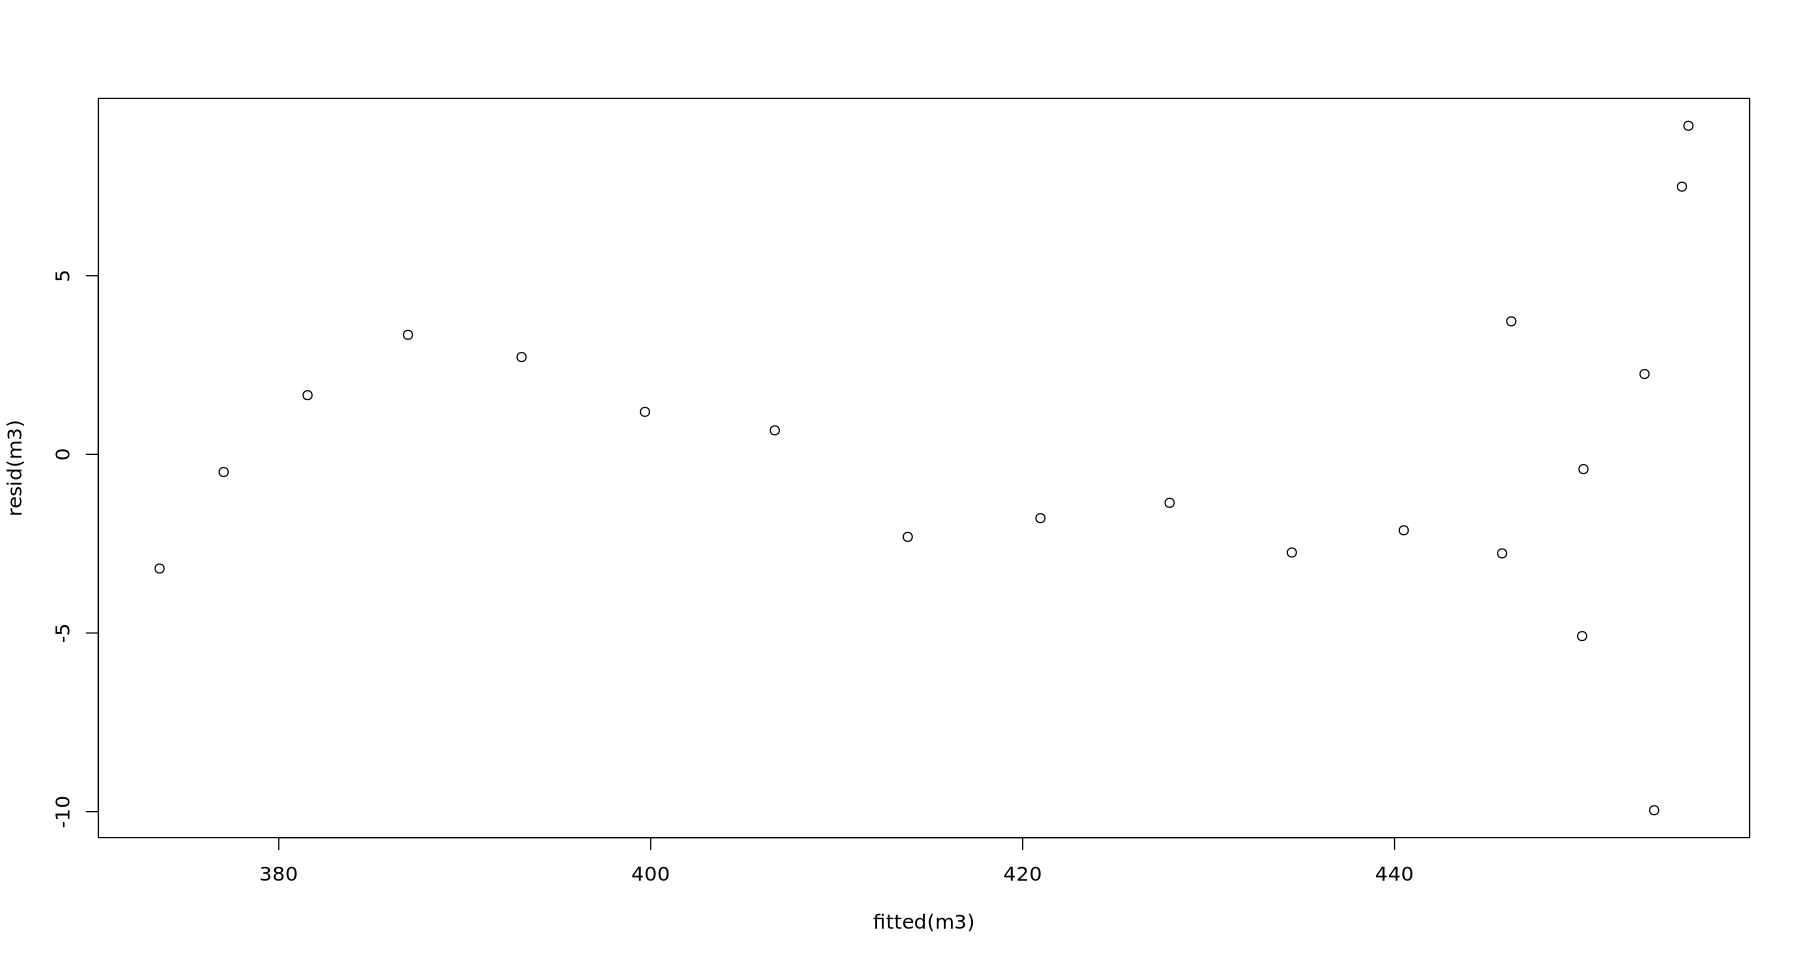

In [185]:
m3 <- lm(y~x+I(x^2)+I(x^3))
plot(fitted(m3), resid(m3))

* 자기상관 모형을 GLS로 추정



In [186]:
V <- diag(20)  ## All of diagonal elements are 0
V <- hat_rho^abs(row(V) - col(V))  ## i와 j의 상관관계는 1차 자기상관을 abs(i-j)만큼 반복한 거니까... 제곱수로 나타난다.
X <- model.matrix(m)
V_inv <- solve(V)
beta <- solve(t(X)%*%V_inv%*%X)%*%t(X)%*%V_inv%*%y
beta

(Intercept),181.324669
x,1.472688


> 전혀 다름. (왜다름...???)

* $Var(\widehat{\boldsymbol{\beta}}) = (X^\top V^{-1} X)^{-1}\sigma^2$

In [191]:
res = y - X%*%beta
mse = sum(res^2)/(length(x) - 2)  ## estimator of sigma square

In [193]:
solve(t(X)%*%V_inv%*%X)*mse

,(Intercept),x
(Intercept),2128.32552,-12.88591802
x,-12.88592,0.07989116


> $\widehat{Var(\hat{\beta_0})}, \widehat{Var(\hat{\beta_1})}$

In [195]:
sqrt((solve(t(X)%*%V_inv%*%X)*mse)[2,2])

[1] 0.2826502

In [196]:
summary(m)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.6377  -5.4908   0.3332   8.3675  14.3635 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 164.3945    21.9106   7.503 6.03e-07 ***
x             1.6056     0.1351  11.884 5.90e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.25 on 18 degrees of freedom
Multiple R-squared:  0.887,	Adjusted R-squared:  0.8807 
F-statistic: 141.2 on 1 and 18 DF,  p-value: 5.898e-10


> 왜 분산이 더 커졌을까...? 아무튼 위 방법으로 구하는 것은 맞아요.

In [197]:
t <- 1:length(x)
m2 <- lm(y~t)
summary(m2)


Call:
lm(formula = y ~ t)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.6767  -5.0587   0.3003   7.8208  13.4988 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 373.5531     4.5932   81.33  < 2e-16 ***
t             4.7433     0.3834   12.37 3.09e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.888 on 18 degrees of freedom
Multiple R-squared:  0.8948,	Adjusted R-squared:  0.8889 
F-statistic:   153 on 1 and 18 DF,  p-value: 3.087e-10


> 시간의 흐름에 따라 증가하는 추세임을 확인할 수 있으므로 그냥 x 없이 적합해도 된다.(물론 이 경우 dwtest하면 양의 자기상관이 있을걸...)